# WiDS Assignment- Machine Learning

## Importing essential Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
#Setting plot size here
sns.set(rc={'figure.figsize':(20,10)})

## 1) Heart Disease prediction using logistic regression

## a) Exploratory data analysis

### Understanding the Data

In [2]:
d=pd.read_csv("C://Users//Rhishabh//Downloads//framingham.csv")
d.head()

male  age  education  currentSmoker  cigsPerDay  BPMeds  prevalentStroke  \
0     1   39        4.0              0         0.0     0.0                0   
1     0   46        2.0              0         0.0     0.0                0   
2     1   48        1.0              1        20.0     0.0                0   
3     0   61        3.0              1        30.0     0.0                0   
4     0   46        3.0              1        23.0     0.0                0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
0             0         0    195.0  106.0   70.0  26.97       80.0     77.0   
1             0         0    250.0  121.0   81.0  28.73       95.0     76.0   
2             0         0    245.0  127.5   80.0  25.34       75.0     70.0   
3             1         0    225.0  150.0   95.0  28.58       65.0    103.0   
4             0         0    285.0  130.0   84.0  23.10       85.0     85.0   

   TenYearCHD  
0           0  
1           0  
2           0  
3           1  
4           0

In [3]:
d.tail()

male  age  education  currentSmoker  cigsPerDay  BPMeds  \
4233     1   50        1.0              1         1.0     0.0   
4234     1   51        3.0              1        43.0     0.0   
4235     0   48        2.0              1        20.0     NaN   
4236     0   44        1.0              1        15.0     0.0   
4237     0   52        2.0              0         0.0     0.0   

      prevalentStroke  prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  \
4233                0             1         0    313.0  179.0   92.0  25.97   
4234                0             0         0    207.0  126.5   80.0  19.71   
4235                0             0         0    248.0  131.0   72.0  22.00   
4236                0             0         0    210.0  126.5   87.0  19.16   
4237                0             0         0    269.0  133.5   83.0  21.47   

      heartRate  glucose  TenYearCHD  
4233       66.0     86.0           1  
4234       65.0     68.0           0  
4235       84.0     86.0           0  
4236       86.0      NaN           0  
4237       80.0    107.0           0

### Cleaning Data

In [4]:
for i in d.columns:
    if len(d[i].dropna())<0.6*len(d[i]):
        d.drop(i,axis=1,inplace=True)
        print(i)
d.head()        

male  age  education  currentSmoker  cigsPerDay  BPMeds  prevalentStroke  \
0     1   39        4.0              0         0.0     0.0                0   
1     0   46        2.0              0         0.0     0.0                0   
2     1   48        1.0              1        20.0     0.0                0   
3     0   61        3.0              1        30.0     0.0                0   
4     0   46        3.0              1        23.0     0.0                0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
0             0         0    195.0  106.0   70.0  26.97       80.0     77.0   
1             0         0    250.0  121.0   81.0  28.73       95.0     76.0   
2             0         0    245.0  127.5   80.0  25.34       75.0     70.0   
3             1         0    225.0  150.0   95.0  28.58       65.0    103.0   
4             0         0    285.0  130.0   84.0  23.10       85.0     85.0   

   TenYearCHD  
0           0  
1           0  
2           0  
3           1  
4           0

In [5]:
d[d.isna().any(axis=1)]

male  age  education  currentSmoker  cigsPerDay  BPMeds  \
14       0   39        2.0              1         9.0     0.0   
21       0   43        1.0              0         0.0     0.0   
26       0   60        1.0              0         0.0     0.0   
33       1   61        NaN              1         5.0     0.0   
36       1   56        NaN              0         0.0     0.0   
...    ...  ...        ...            ...         ...     ...   
4208     0   51        1.0              1         9.0     0.0   
4229     0   51        3.0              1        20.0     0.0   
4230     0   56        1.0              1         3.0     0.0   
4235     0   48        2.0              1        20.0     NaN   
4236     0   44        1.0              1        15.0     0.0   

      prevalentStroke  prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  \
14                  0             0         0    226.0  114.0   64.0  22.35   
21                  0             0         0    185.0  123.5   77.5  29.89   
26                  0             0         0    260.0  110.0   72.5  26.59   
33                  0             0         0    175.0  134.0   82.5  18.59   
36                  0             0         0    257.0  153.5  102.0  28.09   
...               ...           ...       ...      ...    ...    ...    ...   
4208                0             0         0    340.0  152.0   76.0  25.74   
4229                0             1         0    251.0  140.0   80.0  25.60   
4230                0             1         0    268.0  170.0  102.0  22.89   
4235                0             0         0    248.0  131.0   72.0  22.00   
4236                0             0         0    210.0  126.5   87.0  19.16   

      heartRate  glucose  TenYearCHD  
14         85.0      NaN           0  
21         70.0      NaN           0  
26         65.0      NaN           0  
33         72.0     75.0           1  
36         72.0     75.0           0  
...         ...      ...         ...  
4208       70.0      NaN           0  
4229       75.0      NaN           0  
4230       57.0      NaN           0  
4235       84.0     86.0           0  
4236       86.0      NaN           0  

[582 rows x 16 columns]

In [6]:
d.dropna(inplace=True)

In [7]:
d[d.duplicated()]

Empty DataFrame
Columns: [male, age, education, currentSmoker, cigsPerDay, BPMeds, prevalentStroke, prevalentHyp, diabetes, totChol, sysBP, diaBP, BMI, heartRate, glucose, TenYearCHD]
Index: []

In [8]:
d.describe()

male          age    education  currentSmoker   cigsPerDay  \
count  3656.000000  3656.000000  3656.000000    3656.000000  3656.000000   
mean      0.443654    49.557440     1.979759       0.489059     9.022155   
std       0.496883     8.561133     1.022657       0.499949    11.918869   
min       0.000000    32.000000     1.000000       0.000000     0.000000   
25%       0.000000    42.000000     1.000000       0.000000     0.000000   
50%       0.000000    49.000000     2.000000       0.000000     0.000000   
75%       1.000000    56.000000     3.000000       1.000000    20.000000   
max       1.000000    70.000000     4.000000       1.000000    70.000000   

            BPMeds  prevalentStroke  prevalentHyp     diabetes      totChol  \
count  3656.000000      3656.000000   3656.000000  3656.000000  3656.000000   
mean      0.030361         0.005744      0.311543     0.027079   236.873085   
std       0.171602         0.075581      0.463187     0.162335    44.096223   
min       0.000000         0.000000      0.000000     0.000000   113.000000   
25%       0.000000         0.000000      0.000000     0.000000   206.000000   
50%       0.000000         0.000000      0.000000     0.000000   234.000000   
75%       0.000000         0.000000      1.000000     0.000000   263.250000   
max       1.000000         1.000000      1.000000     1.000000   600.000000   

             sysBP        diaBP          BMI    heartRate      glucose  \
count  3656.000000  3656.000000  3656.000000  3656.000000  3656.000000   
mean    132.368025    82.912062    25.784185    75.730580    81.856127   
std      22.092444    11.974825     4.065913    11.982952    23.910128   
min      83.500000    48.000000    15.540000    44.000000    40.000000   
25%     117.000000    75.000000    23.080000    68.000000    71.000000   
50%     128.000000    82.000000    25.380000    75.000000    78.000000   
75%     144.000000    90.000000    28.040000    82.000000    87.000000   
max     295.000000   142.500000    56.800000   143.000000   394.000000   

        TenYearCHD  
count  3656.000000  
mean      0.152352  
std       0.359411  
min       0.000000  
25%       0.000000  
50%       0.000000  
75%       0.000000  
max       1.000000

### Frequency of males and not males in the dataset

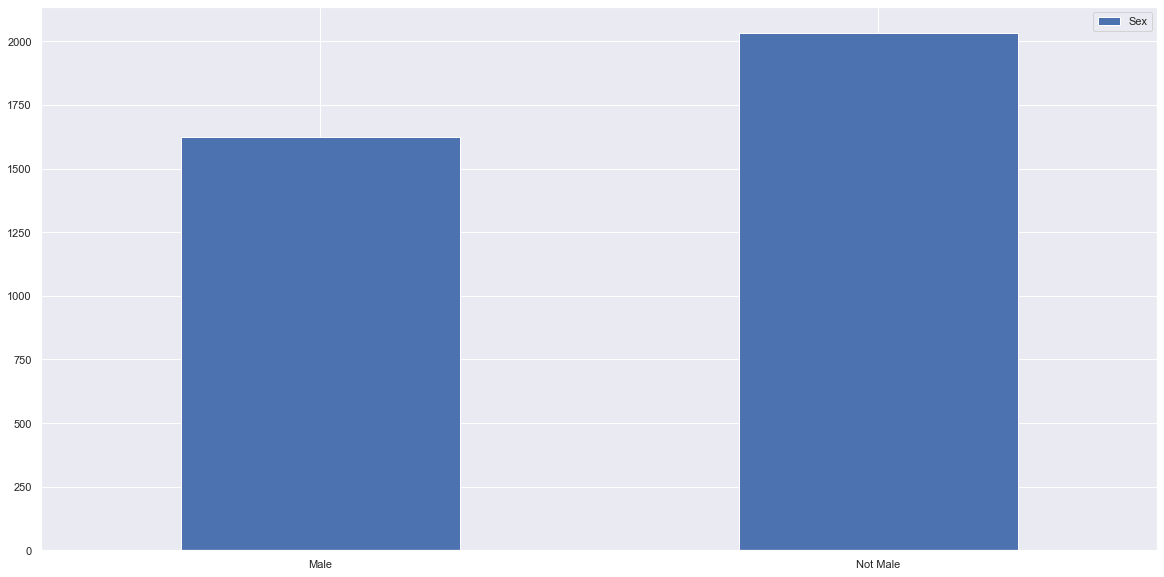

In [9]:
# plot to find the distribution of sex in the dataset
ds=pd.DataFrame(columns=['Male','Not Male'],index=['Sex'])
ds['Male']=[int(d[d['male']==1]['male'].count())]
ds['Not Male']=[int(d[d['male']==0]['male'].count())]
p=ds.transpose().plot(kind='bar')
p.tick_params(axis='x',rotation=0)

### Number of Individuals affected by Coronary heart disease (CHD) within 10 years grouped by sex

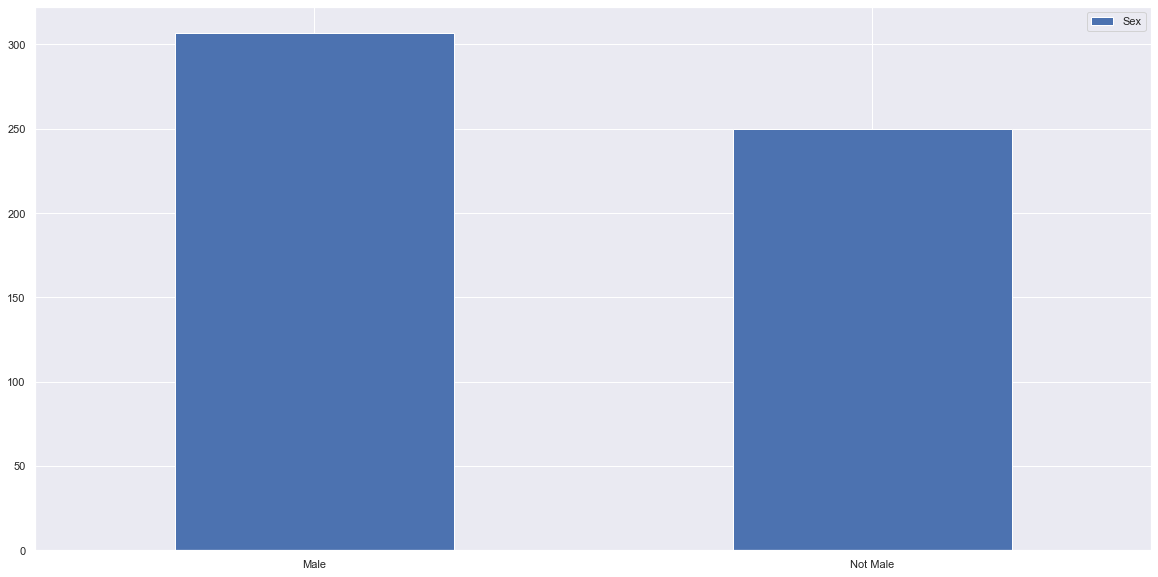

In [10]:
ds=pd.DataFrame(columns=['Male','Not Male'],index=['Sex'])
ds['Male']=[int(d[(d['male']==1)&(d['TenYearCHD']==1)]['male'].count())]
ds['Not Male']=[int(d[(d['male']==0)&(d['TenYearCHD']==1)]['male'].count())]
p=ds.transpose().plot(kind='bar')
p.tick_params(axis='x',rotation=0)

### Number of Individuals affected by CHD within 10 years across various education levels 
#### Levels 1-4

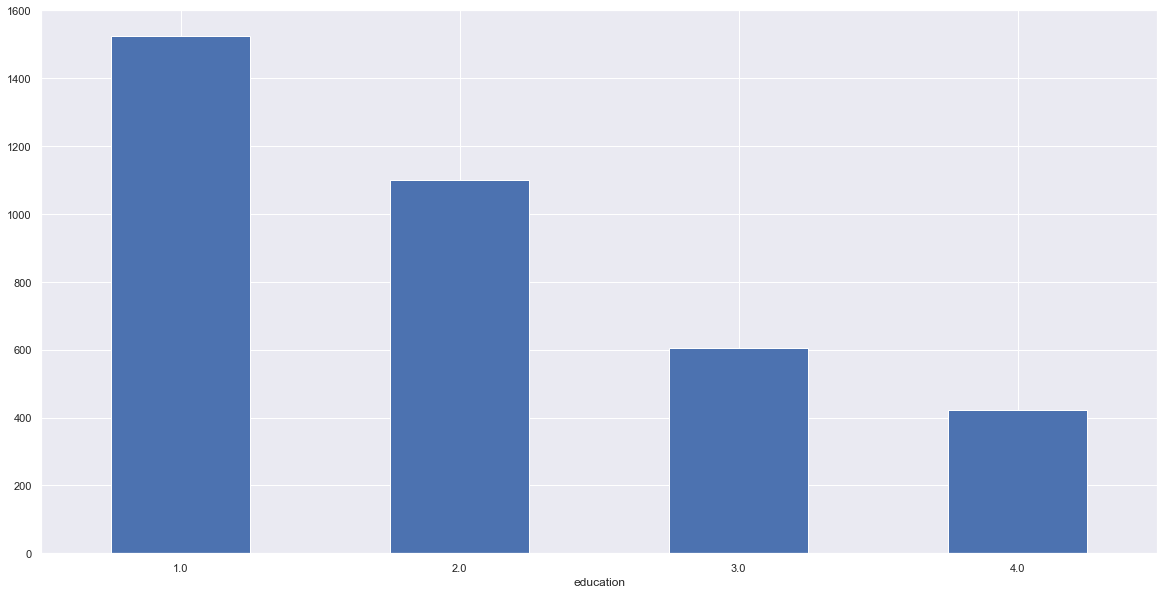

In [11]:
ds=d.groupby('education').size().plot(kind='bar')
ds.tick_params(axis='x',rotation=0)

### Number of Individuals affected by CHD within 10 years across current smokers and non-smokers

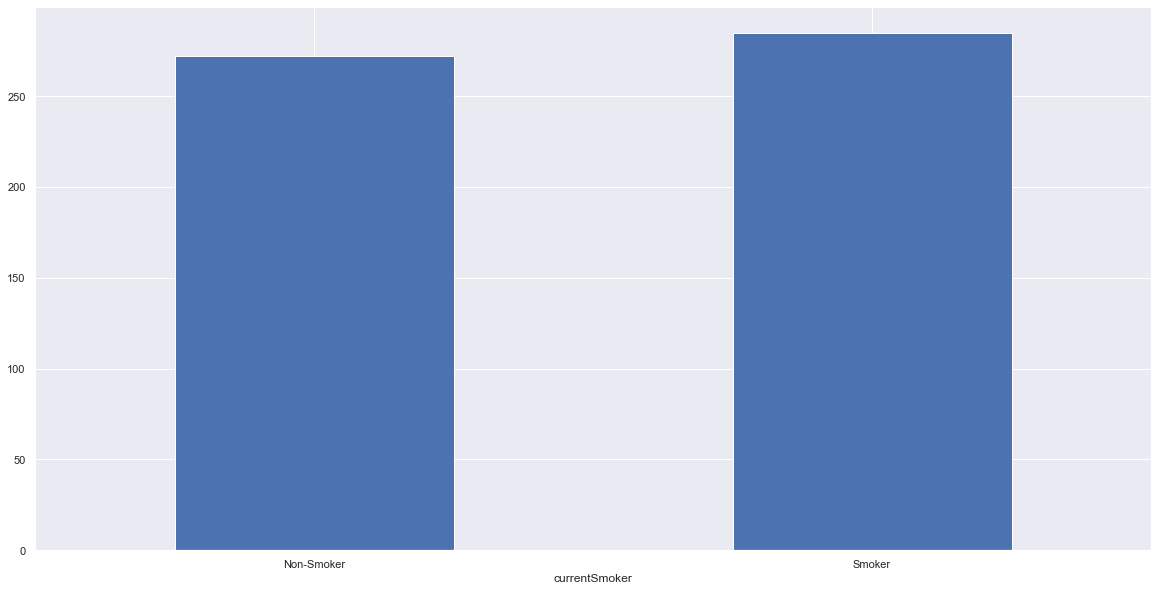

In [12]:
ds=d[d['TenYearCHD']==1]
ds=ds.groupby('currentSmoker').size()
ds.rename(index={0:'Non-Smoker',1:'Smoker'},inplace=True)
ds.plot(kind='bar').tick_params(axis='x',rotation=0)

### CHD occurence vs cigerettes per day

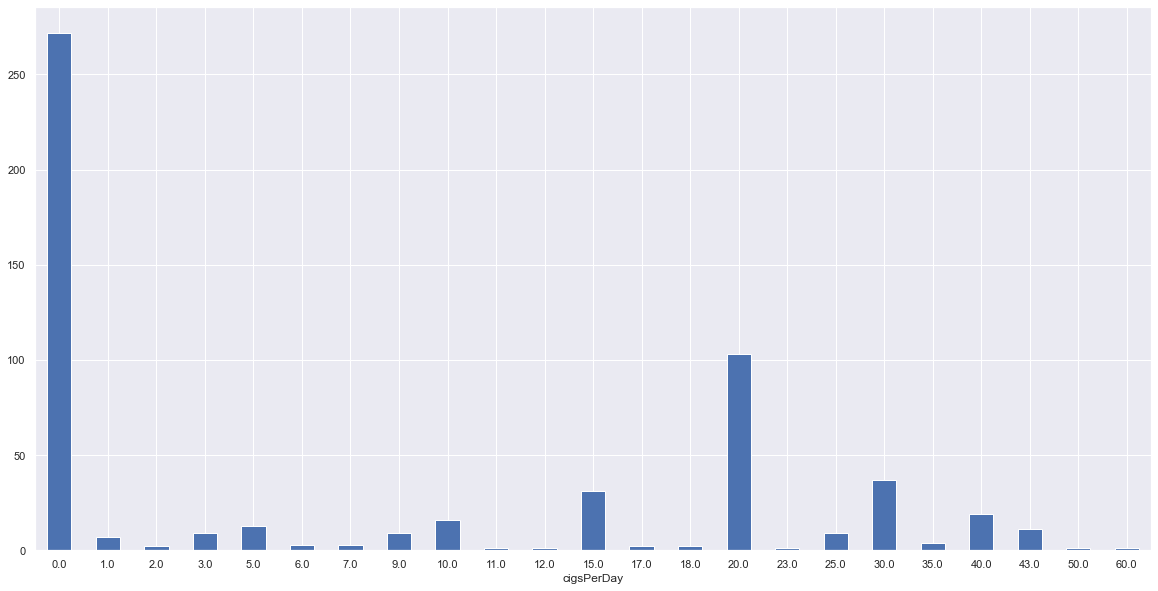

In [13]:
ds=d[d['TenYearCHD']==1]
ds=ds.groupby('cigsPerDay').size()
ds.plot(kind='bar').tick_params(axis='x',rotation=0)

### CHD occurence vs BP medication

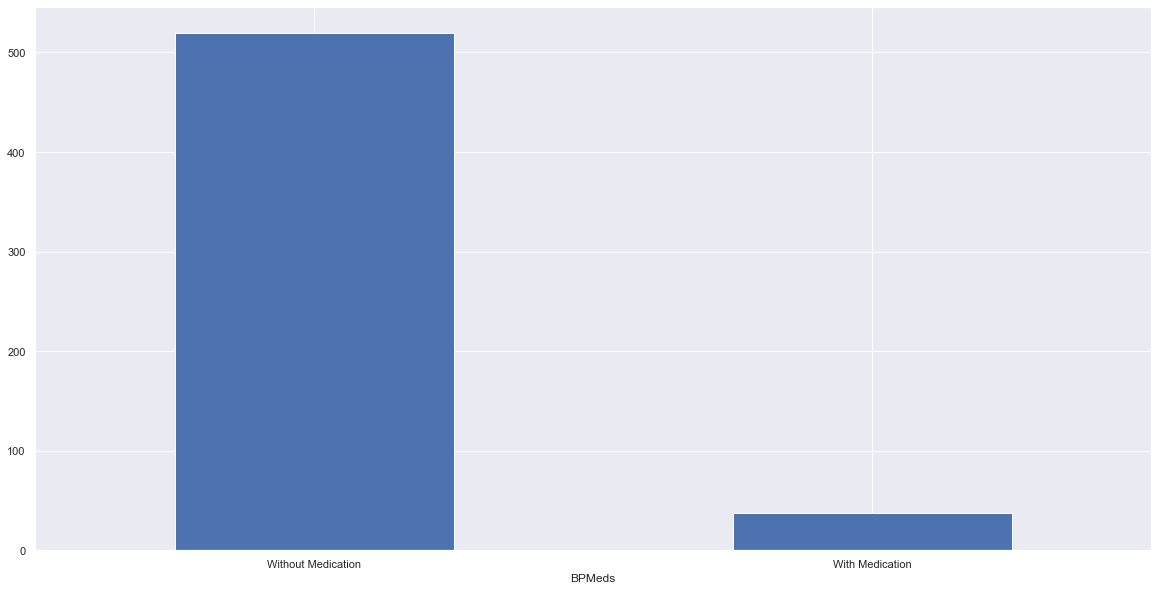

In [14]:
ds=d[d['TenYearCHD']==1]
ds=ds.groupby('BPMeds').size().rename(index={0:'Without Medication',1:'With Medication'})
ds.plot(kind='bar').tick_params(axis='x',rotation=0)

### CHD Occurence vs Prevalent Stroke

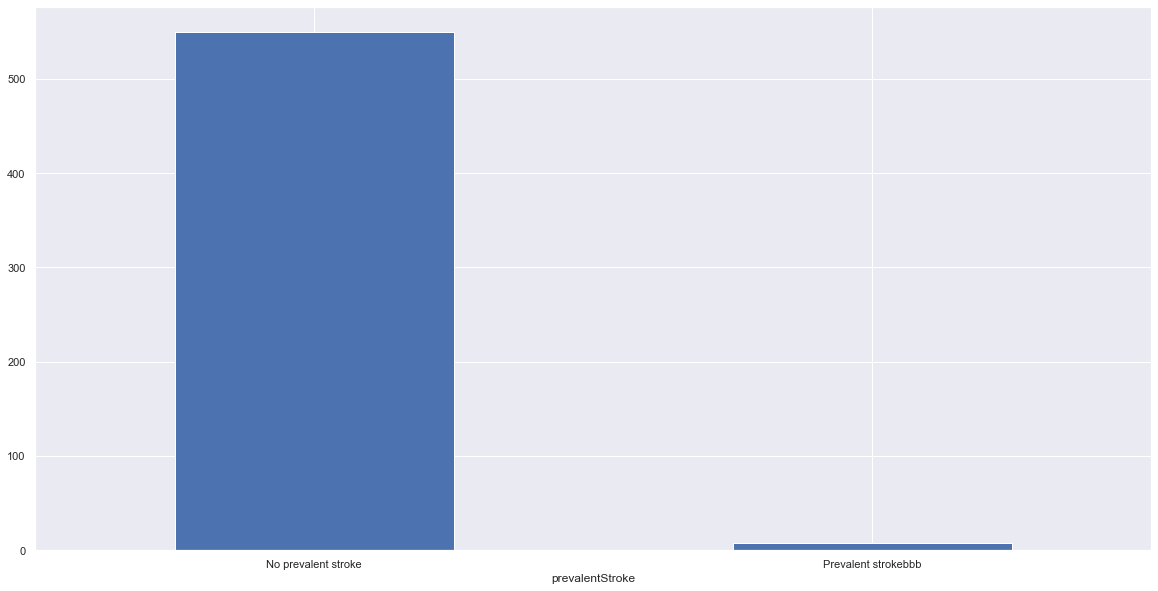

In [15]:
ds=d[d['TenYearCHD']==1]
ds=ds.groupby('prevalentStroke').size().rename(index={0:'No prevalent stroke',1:'Prevalent strokebbb'})
ds.plot(kind='bar').tick_params(axis='x',rotation=0)

### CHD Occurence vs Prevalent Hypertension

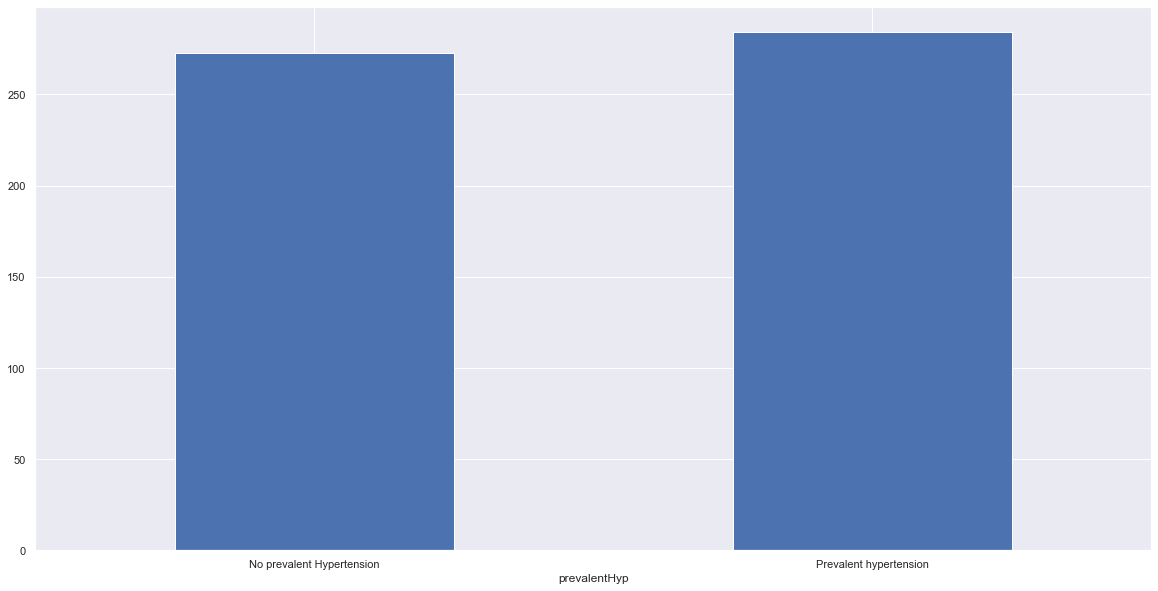

In [16]:
ds=d[d['TenYearCHD']==1]
ds=ds.groupby('prevalentHyp').size().rename(index={0:'No prevalent Hypertension',1:'Prevalent hypertension'})
ds.plot(kind='bar').tick_params(axis='x',rotation=0)

### CHD Occurence vs diabetes

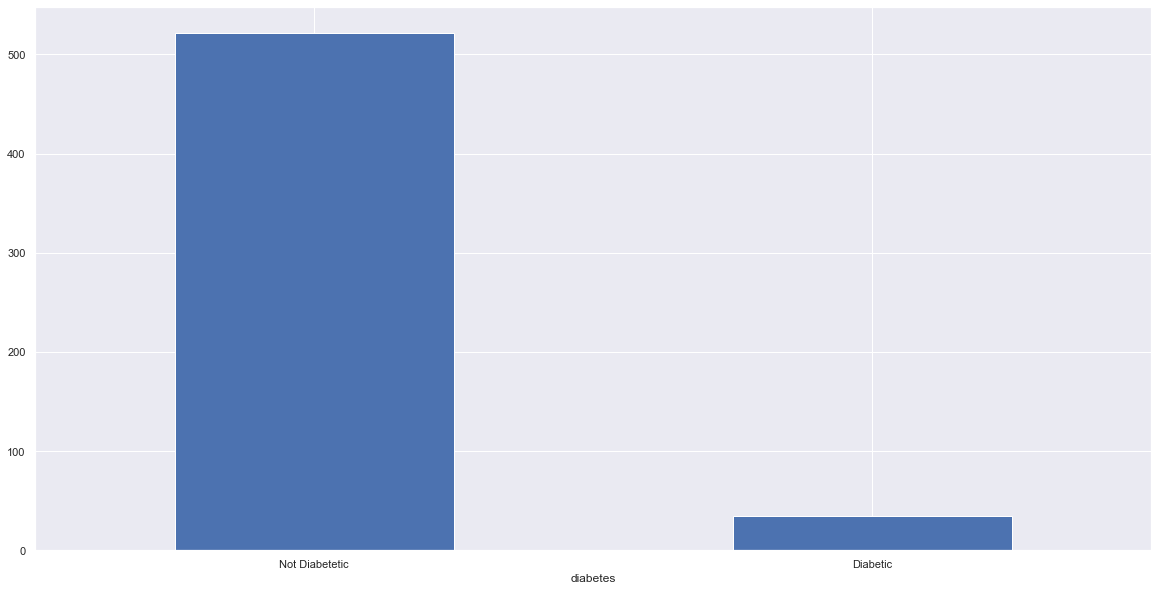

In [17]:
ds=d[d['TenYearCHD']==1]
ds=ds.groupby('diabetes').size().rename(index={0:'Not Diabetetic',1:'Diabetic'})
ds.plot(kind='bar').tick_params(axis='x',rotation=0)

### CHD Occurence vs Cholesterol

[Text(0.5, 0, 'Total Cholesterol'),
 Text(0, 0.5, 'CHD Occurence within 10 years'),
 (0.0, 800.0)]

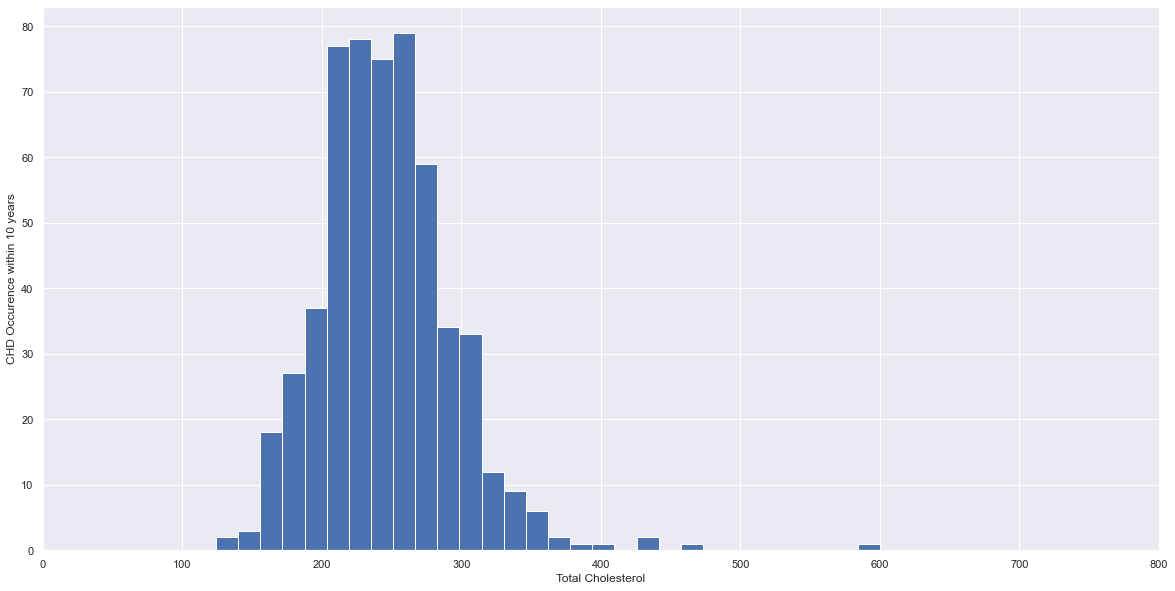

In [18]:
ds=d[d['TenYearCHD']==1]
ds['totChol'].plot(kind='hist',bins=30).set(xlabel='Total Cholesterol',ylabel='CHD Occurence within 10 years',xlim=(0,800))

### CHD Occurence vs BMI

[Text(0.5, 0, 'BMI'),
 Text(0, 0.5, 'CHD Occurence within 10 years'),
 (0.0, 50.0)]

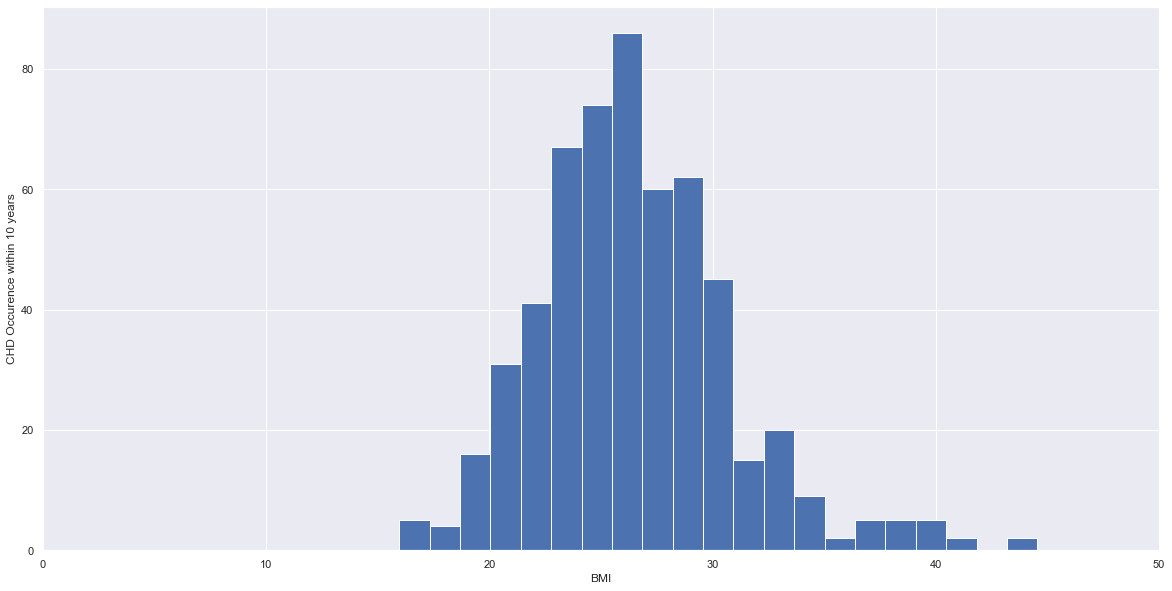

In [19]:
s=d[d['TenYearCHD']==1]
ds['BMI'].plot(kind='hist',bins=30).set(xlabel='BMI',ylabel='CHD Occurence within 10 years',xlim=(0,50))

### CHD Occurence vs Systolic Blood Pressure

[Text(0.5, 0, 'Systolic BP'),
 Text(0, 0.5, 'CHD Occurence within 10 years'),
 (0.0, 400.0)]

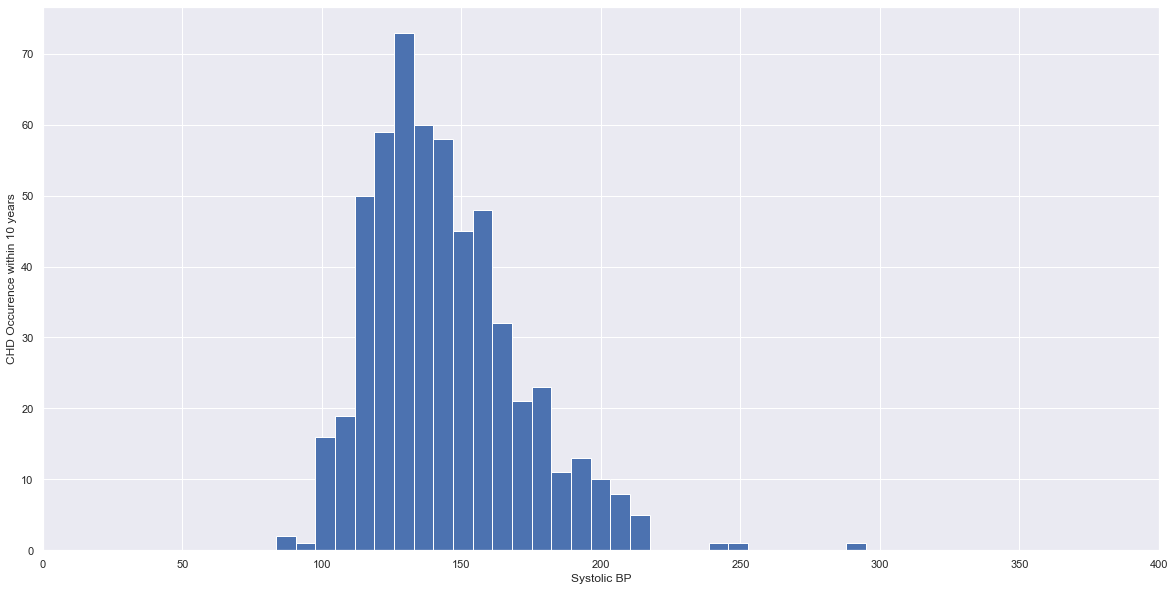

In [20]:
s=d[d['TenYearCHD']==1]
ds['sysBP'].plot(kind='hist',bins=30).set(xlabel='Systolic BP',ylabel='CHD Occurence within 10 years',xlim=(0,400))

### CHD Occurence vs Diastolic Blood Pressure

[Text(0.5, 0, 'Diastolic BP'),
 Text(0, 0.5, 'CHD Occurence within 10 years'),
 (0.0, 150.0)]

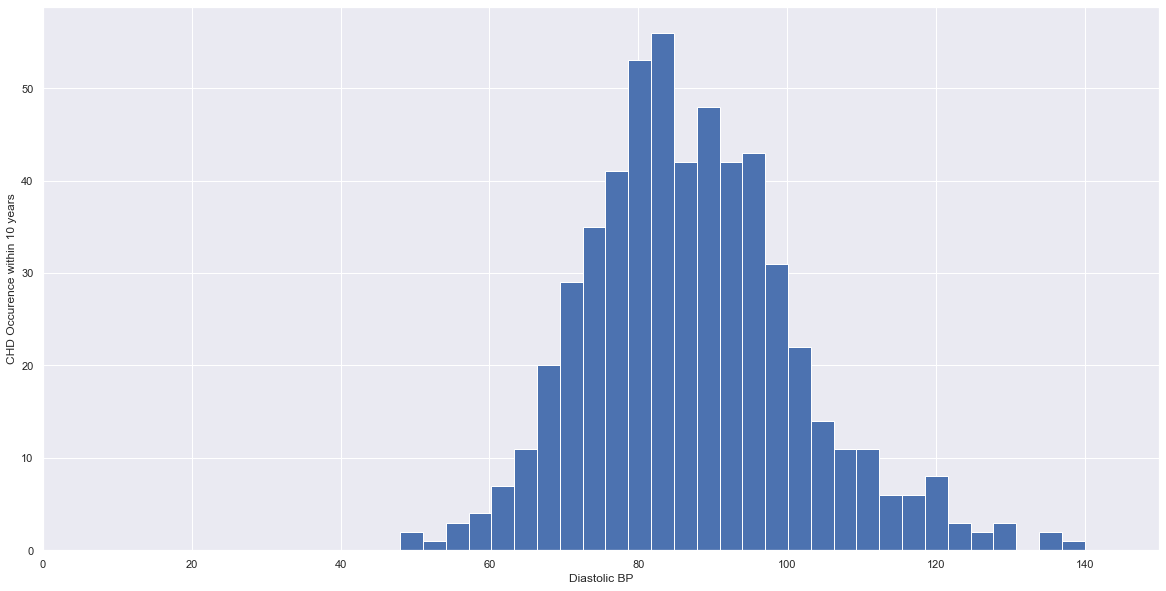

In [21]:
s=d[d['TenYearCHD']==1]
ds['diaBP'].plot(kind='hist',bins=30).set(xlabel='Diastolic BP',ylabel='CHD Occurence within 10 years',xlim=(0,150))

### CHD Occurence vs Heart rate

[Text(0.5, 0, 'Heart Rate'),
 Text(0, 0.5, 'CHD Occurence within 10 years'),
 (0.0, 150.0)]

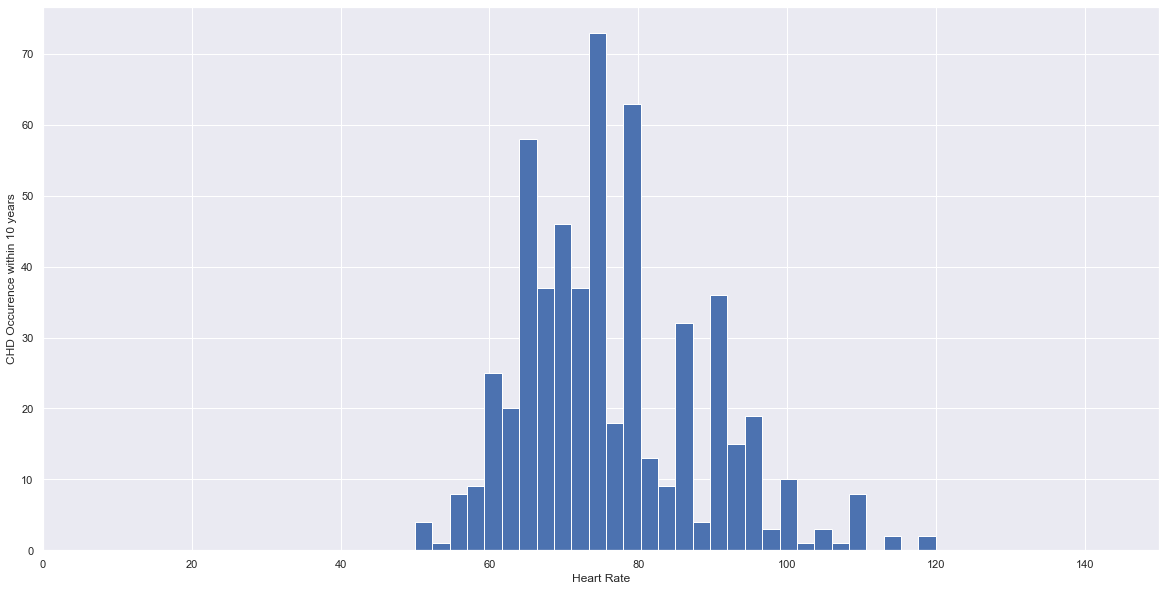

In [22]:
s=d[d['TenYearCHD']==1]
ds['heartRate'].plot(kind='hist',bins=30).set(xlabel='Heart Rate',ylabel='CHD Occurence within 10 years',xlim=(0,150))

### CHD Occurence vs Blood Glucose levels

[Text(0.5, 0, 'Glucose'),
 Text(0, 0.5, 'CHD Occurence within 10 years'),
 (0.0, 500.0)]

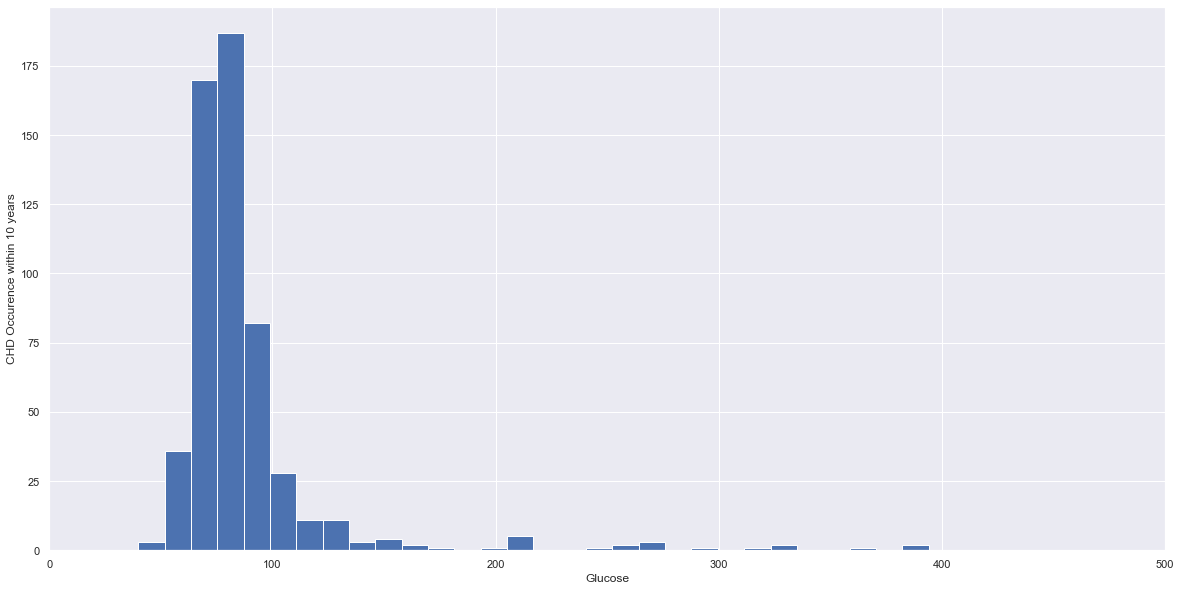

In [23]:
s=d[d['TenYearCHD']==1]
ds['glucose'].plot(kind='hist',bins=30).set(xlabel='Glucose',ylabel='CHD Occurence within 10 years',xlim=(0,500))

### Correlation Matrix

<AxesSubplot:>

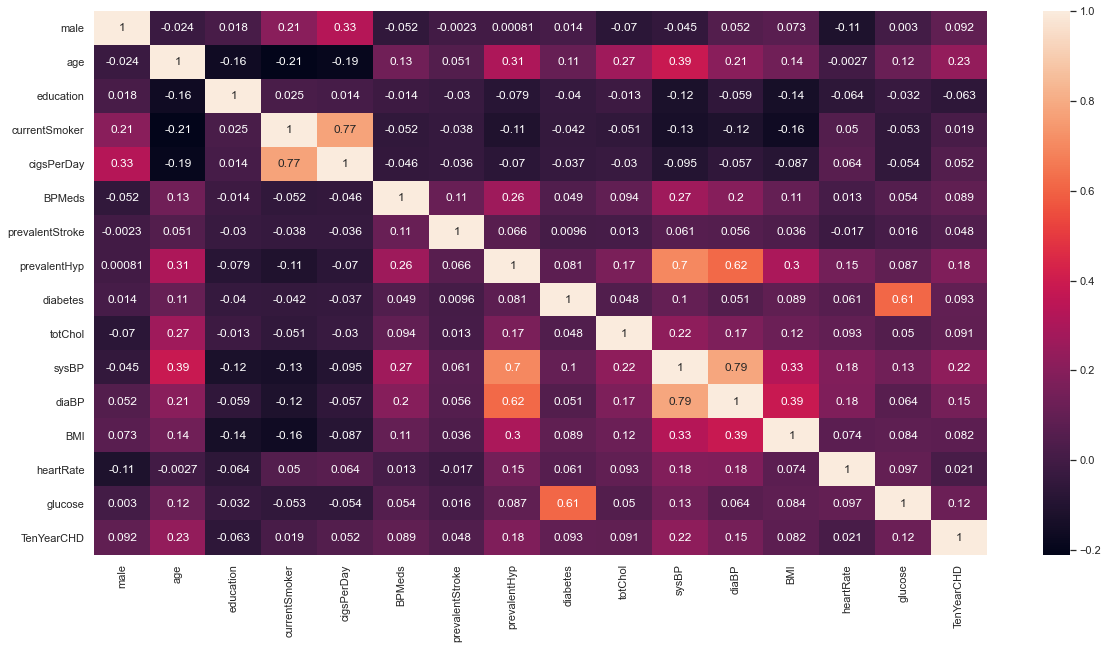

In [24]:
sns.heatmap(d.corr(),annot=True)

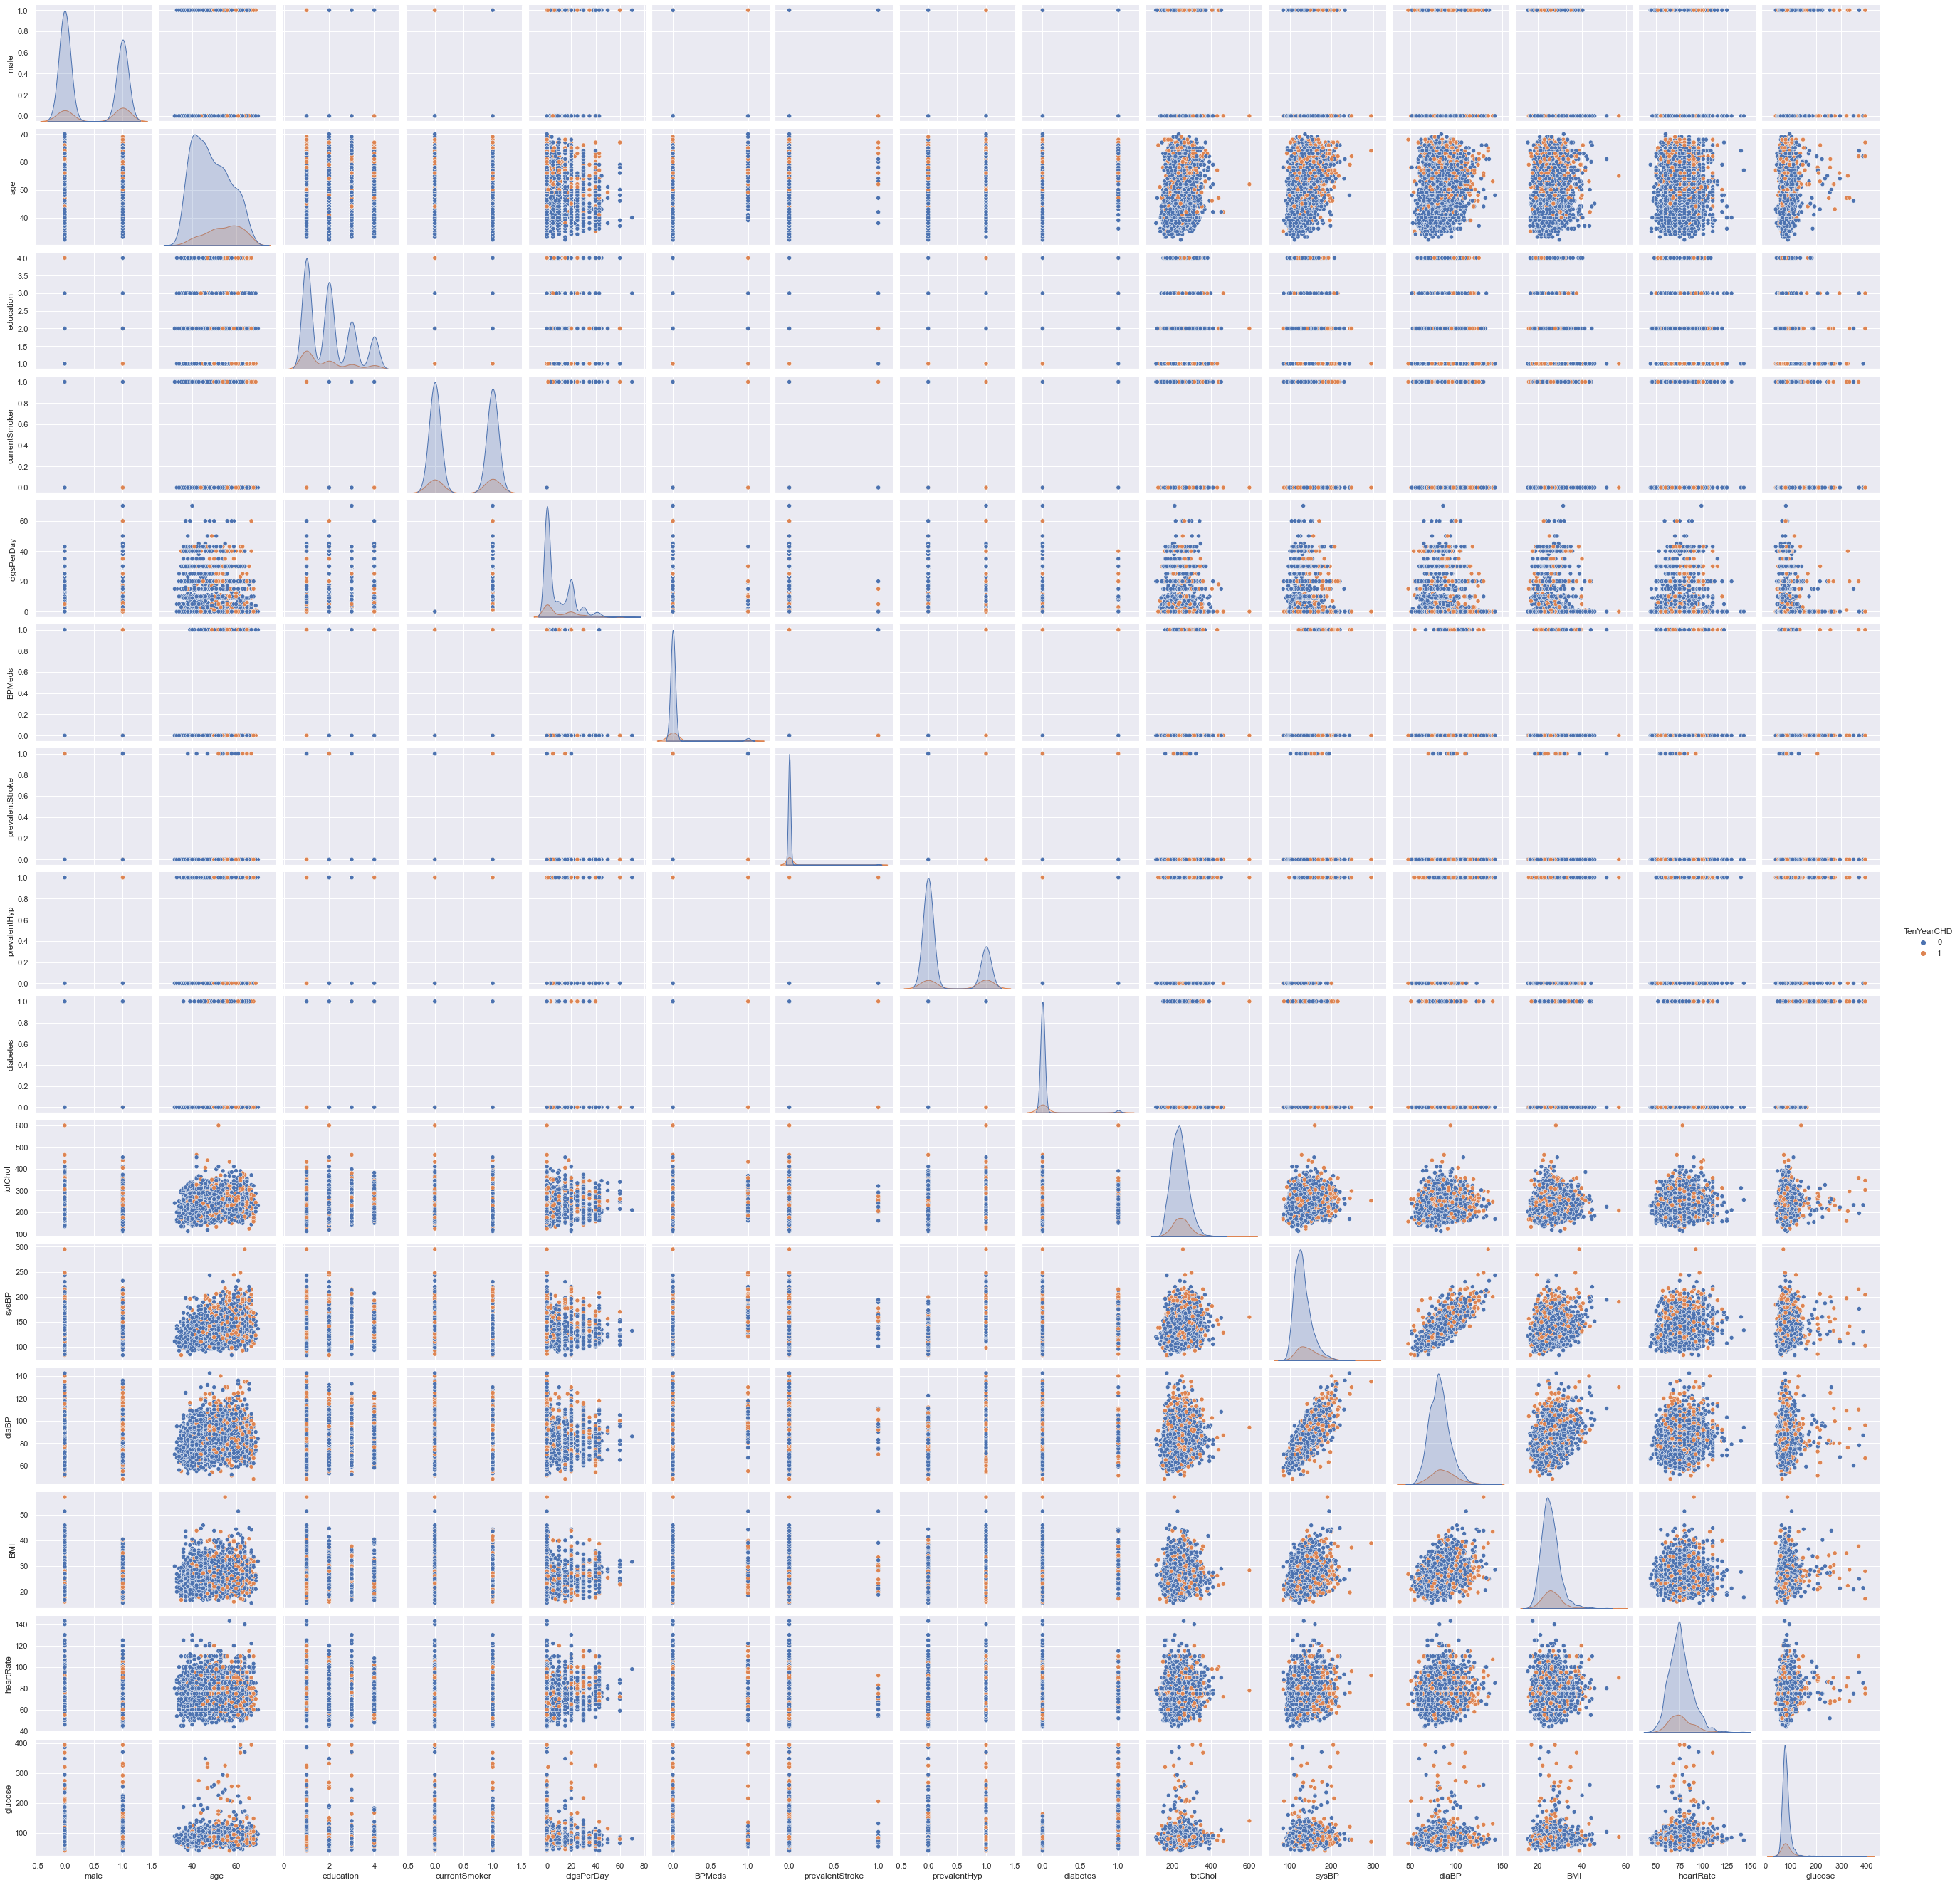

In [25]:
sns.pairplot(d,hue='TenYearCHD')

In [26]:
d.head()

male  age  education  currentSmoker  cigsPerDay  BPMeds  prevalentStroke  \
0     1   39        4.0              0         0.0     0.0                0   
1     0   46        2.0              0         0.0     0.0                0   
2     1   48        1.0              1        20.0     0.0                0   
3     0   61        3.0              1        30.0     0.0                0   
4     0   46        3.0              1        23.0     0.0                0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
0             0         0    195.0  106.0   70.0  26.97       80.0     77.0   
1             0         0    250.0  121.0   81.0  28.73       95.0     76.0   
2             0         0    245.0  127.5   80.0  25.34       75.0     70.0   
3             1         0    225.0  150.0   95.0  28.58       65.0    103.0   
4             0         0    285.0  130.0   84.0  23.10       85.0     85.0   

   TenYearCHD  
0           0  
1           0  
2           0  
3           1  
4           0

## b) ML

In this section, we implement a Logistic regression model to predict the ten Year risk of coronary heart disease across various lifestyles. The target variable is TenYearCHD which takes values 1 or 0 indicating whether or not the person has got the disease in 10 years. From the correlation matrix in the previous section, it is clear that sysBP and diaBP are highly correlated (correlation coefficient=0.78). Similarly (cigsPerDay,currentSmoker), (sysBP,prevalentHyp) and (glucose,diabetes) are also highly correlated. Hence, we drop sysBP, currentSmoker and glucose.

### Preparing the data

In [27]:
d=d.drop(['sysBP','currentSmoker','glucose'],axis=1)
d.head()

male  age  education  cigsPerDay  BPMeds  prevalentStroke  prevalentHyp  \
0     1   39        4.0         0.0     0.0                0             0   
1     0   46        2.0         0.0     0.0                0             0   
2     1   48        1.0        20.0     0.0                0             0   
3     0   61        3.0        30.0     0.0                0             1   
4     0   46        3.0        23.0     0.0                0             0   

   diabetes  totChol  diaBP    BMI  heartRate  TenYearCHD  
0         0    195.0   70.0  26.97       80.0           0  
1         0    250.0   81.0  28.73       95.0           0  
2         0    245.0   80.0  25.34       75.0           0  
3         0    225.0   95.0  28.58       65.0           1  
4         0    285.0   84.0  23.10       85.0           0

Since the gender has no ordinal preference we use one Hot encoding on the male variable. The remaining categorical variables have an ordinal relationship, hence we are not applting one hot encoding to them.

In [28]:
d=pd.concat([pd.get_dummies(d['male']),d],axis=1)
d=d.drop(['male'],axis=1)
d=d.rename(columns={1:'male',0:'Not male'})
d

Not male  male  age  education  cigsPerDay  BPMeds  prevalentStroke  \
0            0     1   39        4.0         0.0     0.0                0   
1            1     0   46        2.0         0.0     0.0                0   
2            0     1   48        1.0        20.0     0.0                0   
3            1     0   61        3.0        30.0     0.0                0   
4            1     0   46        3.0        23.0     0.0                0   
...        ...   ...  ...        ...         ...     ...              ...   
4231         0     1   58        3.0         0.0     0.0                0   
4232         0     1   68        1.0         0.0     0.0                0   
4233         0     1   50        1.0         1.0     0.0                0   
4234         0     1   51        3.0        43.0     0.0                0   
4237         1     0   52        2.0         0.0     0.0                0   

      prevalentHyp  diabetes  totChol  diaBP    BMI  heartRate  TenYearCHD  
0                0         0    195.0   70.0  26.97       80.0           0  
1                0         0    250.0   81.0  28.73       95.0           0  
2                0         0    245.0   80.0  25.34       75.0           0  
3                1         0    225.0   95.0  28.58       65.0           1  
4                0         0    285.0   84.0  23.10       85.0           0  
...            ...       ...      ...    ...    ...        ...         ...  
4231             1         0    187.0   81.0  24.96       80.0           0  
4232             1         0    176.0   97.0  23.14       60.0           1  
4233             1         0    313.0   92.0  25.97       66.0           1  
4234             0         0    207.0   80.0  19.71       65.0           0  
4237             0         0    269.0   83.0  21.47       80.0           0  

[3656 rows x 14 columns]

In [29]:
d[['cigsPerDay','totChol','diaBP','BMI','heartRate']]=(d[['cigsPerDay','totChol','diaBP','BMI','heartRate']]-d[['cigsPerDay','totChol','diaBP','BMI','heartRate']].mean())/d[['cigsPerDay','totChol','diaBP','BMI','heartRate']].std()
Y=d['TenYearCHD']
X=d.drop(['TenYearCHD'],axis=1)
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=1)

### Applying logistic regression

In [30]:
classifier=LogisticRegression(max_iter=1000)
classifier.fit(x_train,y_train)
y_pred=classifier.predict(x_test)
print(classification_report(y_test, y_pred,target_names=['No CHD','CHD']))

              precision    recall  f1-score   support

      No CHD       0.86      1.00      0.93       627
         CHD       1.00      0.06      0.11       105

    accuracy                           0.86       732
   macro avg       0.93      0.53      0.52       732
weighted avg       0.88      0.86      0.81       732



In [31]:
print(confusion_matrix(y_test,y_pred))

[[627   0]
 [ 99   6]]


In [32]:
print("Accuracy of model=",accuracy_score(y_test,y_pred)*100,"%")

Accuracy of model= 86.47540983606558 %


## 2) Predicting house prices in Boston using Boston house price dataset

## a) Exploratory data Analysis

### Understanding the data

In [33]:
df=pd.read_csv('C://Users//Rhishabh//Downloads//boston.csv')
df.head()

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2

### Variable Description

Variable     | Description
-------------|-------------
  **CRIM**   | per capita crime rate by town
  **ZN**     | proportion of residential land zoned for lots over 25,000 sq.ft.
  **INDUS**  | proportion of non-retail business acres per town
  **CHAS**   | Charles River dummy variable (1 if tract bounds river; 0 otherwise)
  **NOX**    | nitric oxides concentration (parts per 10 million) [parts/10M]
  **RM**     | average number of rooms per dwelling
  **AGE**    | proportion of owner-occupied units built prior to 1940
  **DIS**    | weighted distances to five Boston employment centres
  **RAD**    | index of accessibility to radial highways
  **TAX**    | full-value property-tax rate per \\$10,000 [\\$/10k]
  **PTRATIO**| pupil-teacher ratio by town
  **B**      | The result of the equation B=1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
  **LSTAT**  |% lower status of the population
  **MEDV**   |Median value of owner-occupied homes in \\$1000's [k\\$]

In [34]:
df.tail()

CRIM   ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
501  0.06263  0.0  11.93     0  0.573  6.593  69.1  2.4786    1  273.0   
502  0.04527  0.0  11.93     0  0.573  6.120  76.7  2.2875    1  273.0   
503  0.06076  0.0  11.93     0  0.573  6.976  91.0  2.1675    1  273.0   
504  0.10959  0.0  11.93     0  0.573  6.794  89.3  2.3889    1  273.0   
505  0.04741  0.0  11.93     0  0.573  6.030  80.8  2.5050    1  273.0   

     PTRATIO       B  LSTAT  MEDV  
501     21.0  391.99   9.67  22.4  
502     21.0  396.90   9.08  20.6  
503     21.0  396.90   5.64  23.9  
504     21.0  393.45   6.48  22.0  
505     21.0  396.90   7.88  11.9

In [35]:
df.describe()

CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.148861    2.105710    8.707259  168.537116    2.164946   91.294864   
min      2.900000    1.129600    1.000000  187.000000   12.600000    0.320000   
25%     45.025000    2.100175    4.000000  279.000000   17.400000  375.377500   
50%     77.500000    3.207450    5.000000  330.000000   19.050000  391.440000   
75%     94.075000    5.188425   24.000000  666.000000   20.200000  396.225000   
max    100.000000   12.126500   24.000000  711.000000   22.000000  396.900000   

            LSTAT        MEDV  
count  506.000000  506.000000  
mean    12.653063   22.532806  
std      7.141062    9.197104  
min      1.730000    5.000000  
25%      6.950000   17.025000  
50%     11.360000   21.200000  
75%     16.955000   25.000000  
max     37.970000   50.000000

In [36]:
df[df.isna().any(axis=1)]

Empty DataFrame
Columns: [CRIM, ZN, INDUS, CHAS, NOX, RM, AGE, DIS, RAD, TAX, PTRATIO, B, LSTAT, MEDV]
Index: []

In [37]:
df[df.duplicated()]

Empty DataFrame
Columns: [CRIM, ZN, INDUS, CHAS, NOX, RM, AGE, DIS, RAD, TAX, PTRATIO, B, LSTAT, MEDV]
Index: []

In [38]:
df.nunique()

CRIM       504
ZN          26
INDUS       76
CHAS         2
NOX         81
RM         446
AGE        356
DIS        412
RAD          9
TAX         66
PTRATIO     46
B          357
LSTAT      455
MEDV       229
dtype: int64

### CRIM vs MEDV

<AxesSubplot:xlabel='CRIM', ylabel='MEDV'>

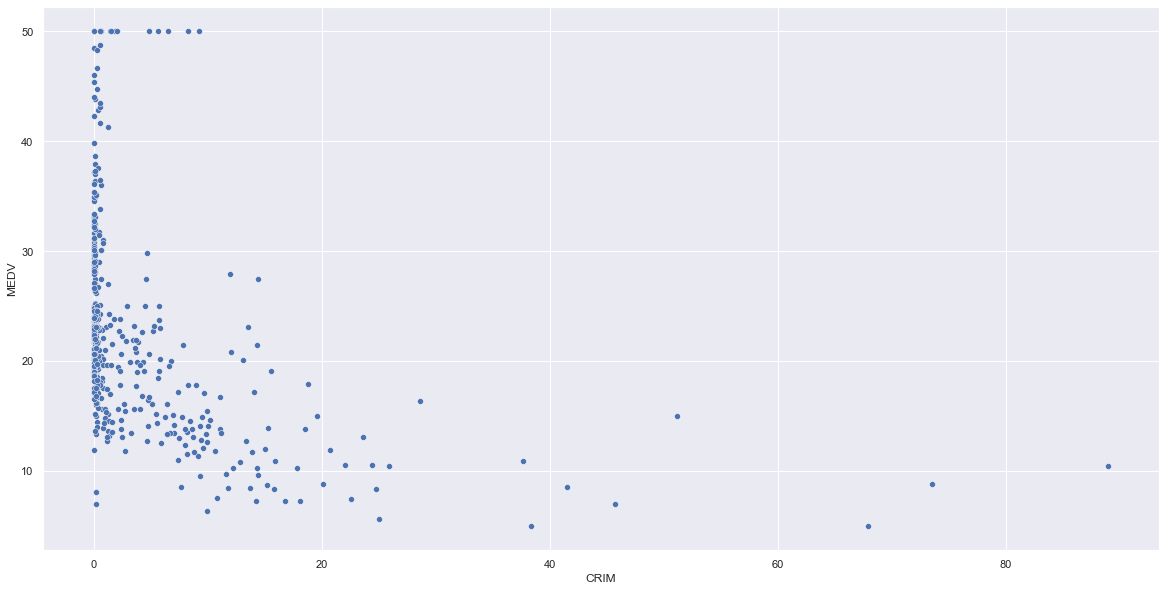

In [39]:
sns.scatterplot(x='CRIM',y='MEDV',data=df)

### CRIM box plot

<AxesSubplot:>

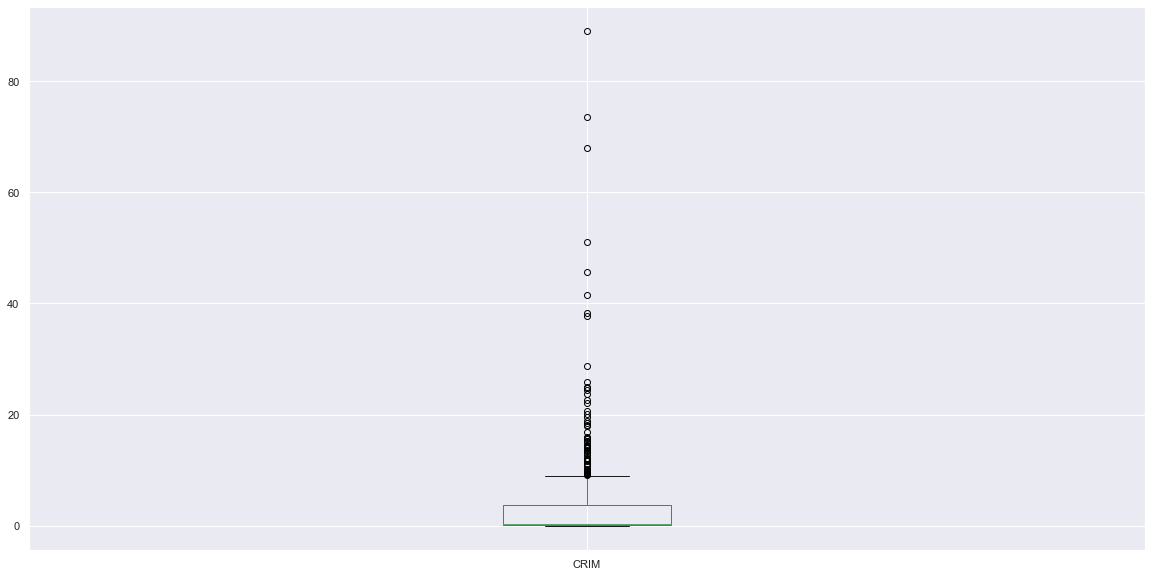

In [40]:
df['CRIM'].plot(kind='box')

### ZN vs MEDV

<AxesSubplot:xlabel='ZN', ylabel='MEDV'>

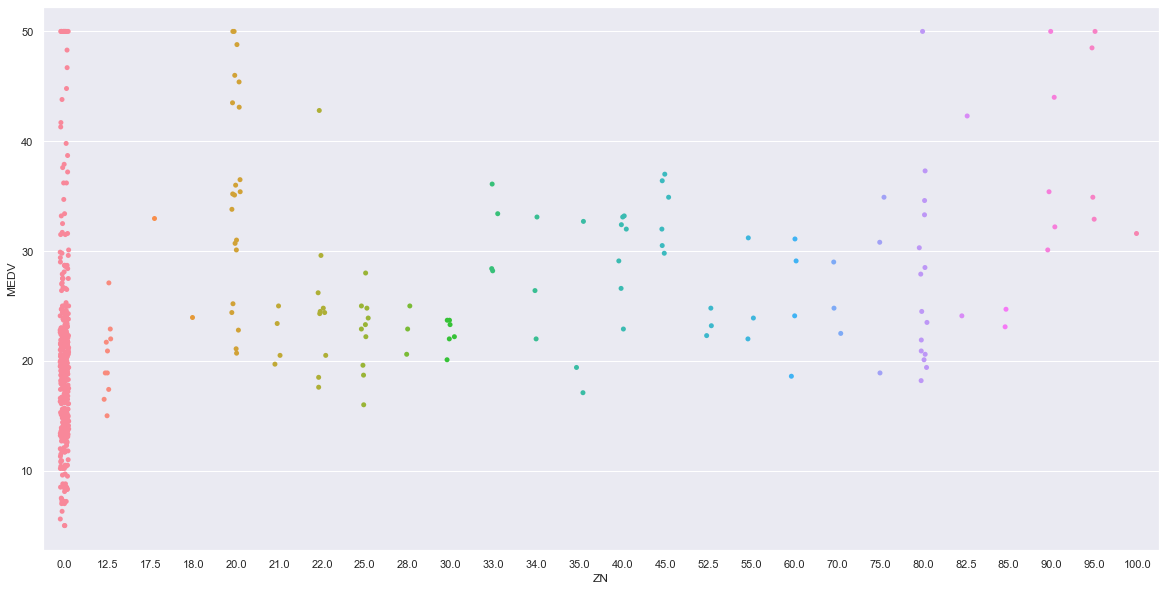

In [41]:
sns.stripplot(x='ZN',y='MEDV',data=df)

<AxesSubplot:xlabel='ZN', ylabel='MEDV'>

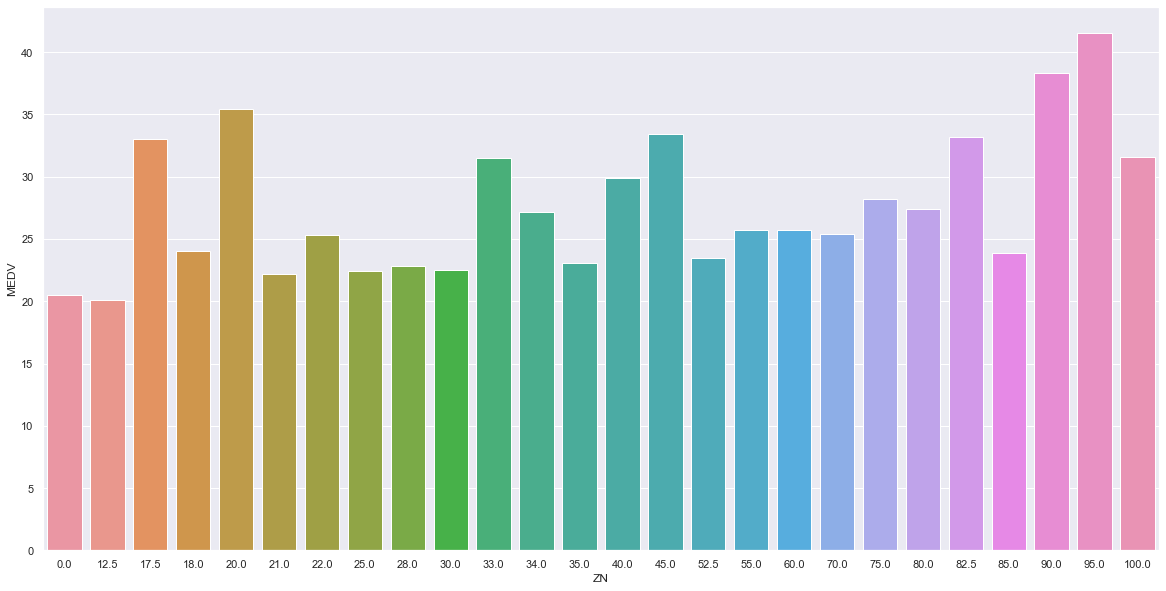

In [42]:
sns.barplot(x='ZN',y='MEDV',data=df,ci=None)

### ZN frequency plot

<AxesSubplot:xlabel='ZN'>

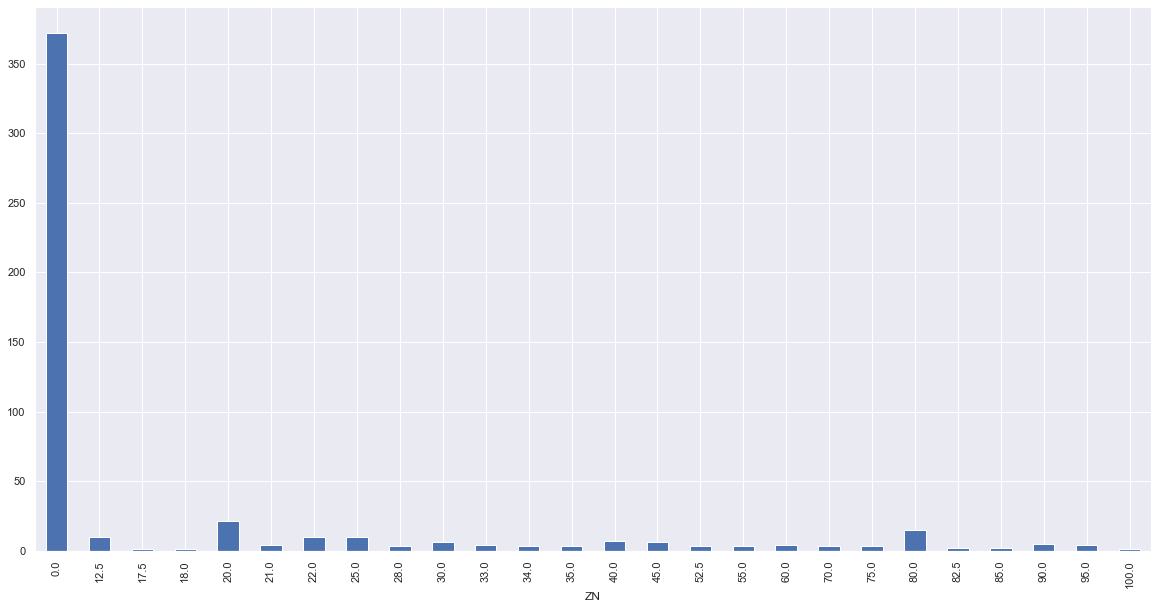

In [43]:
df.groupby('ZN').size().plot(kind='bar')

### INDUS vs MEDV

<AxesSubplot:xlabel='INDUS', ylabel='MEDV'>

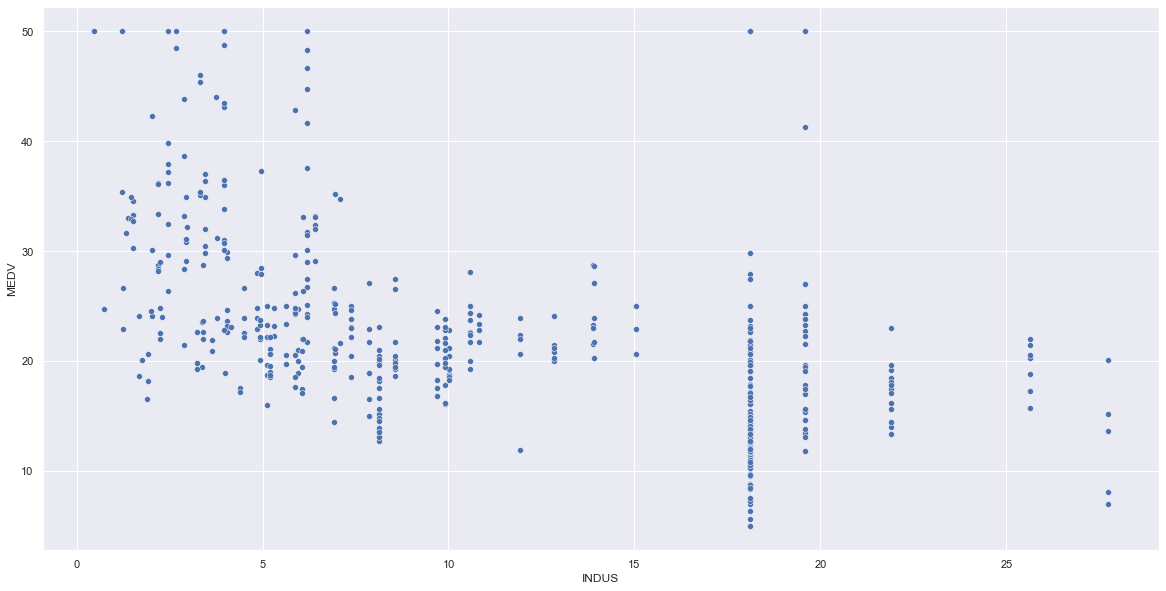

In [44]:
sns.scatterplot(x='INDUS',y='MEDV',data=df)

### INDUS box plot

<AxesSubplot:>

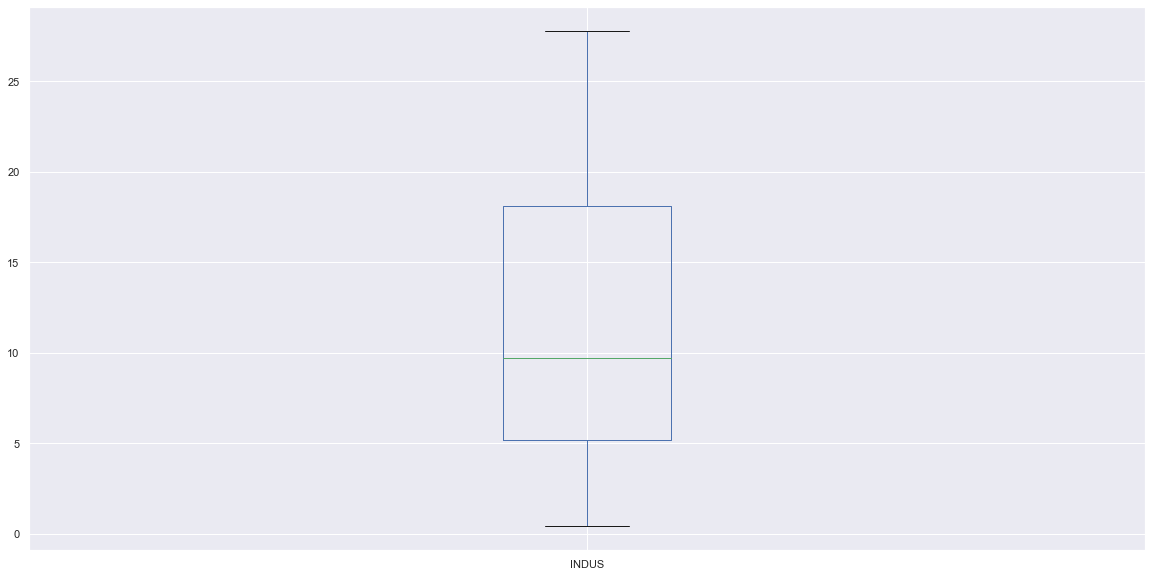

In [45]:
df['INDUS'].plot(kind='box')

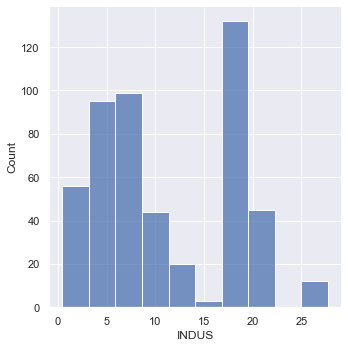

In [46]:
sns.displot(df,x='INDUS')

### CHAS vs MEDV

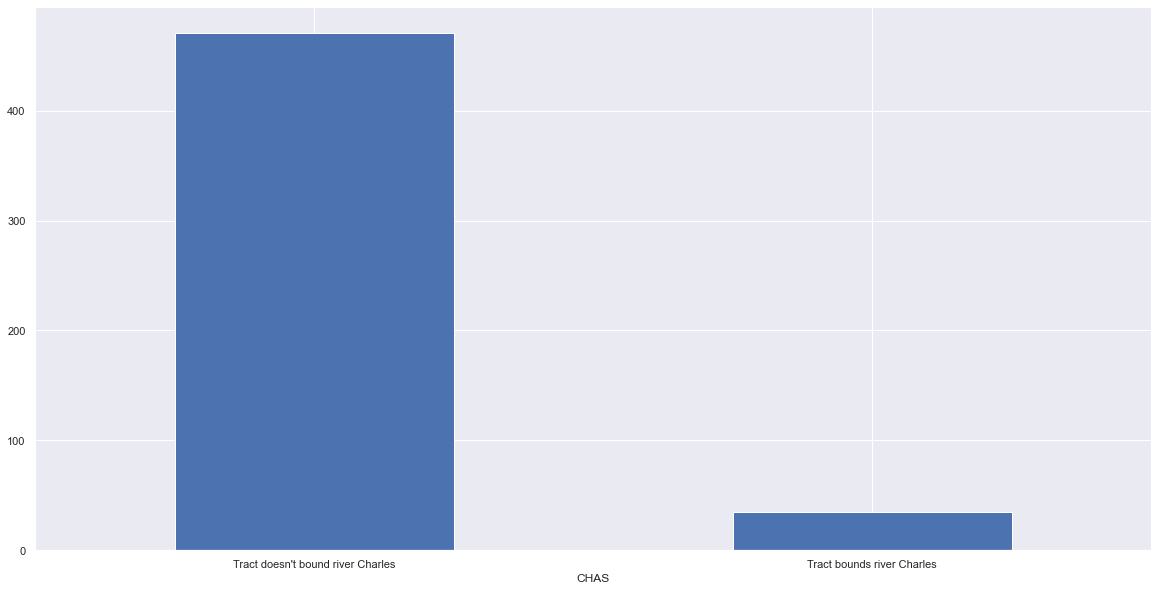

In [47]:
df.groupby('CHAS').size().rename(index={0:'Tract doesn\'t bound river Charles',1:'Tract bounds river Charles'}).plot(kind='bar').tick_params(axis='x',rotation=0)

### NOX vs MEDV

<AxesSubplot:xlabel='NOX', ylabel='MEDV'>

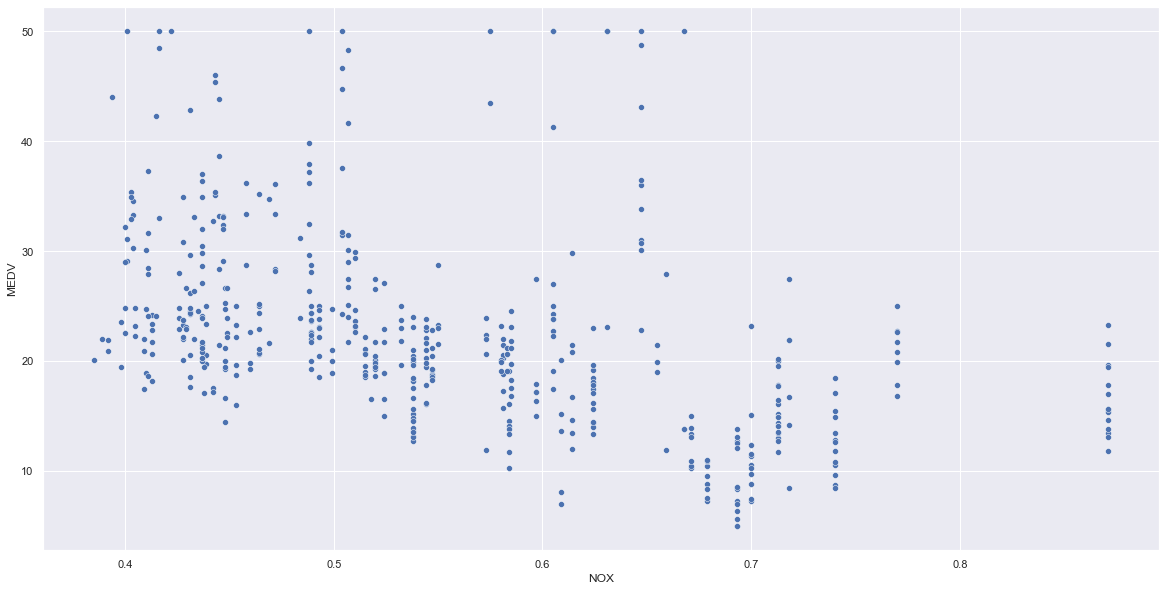

In [48]:
sns.scatterplot(x='NOX',y='MEDV',data=df)

### RM vs MEDV

<AxesSubplot:xlabel='RM', ylabel='MEDV'>

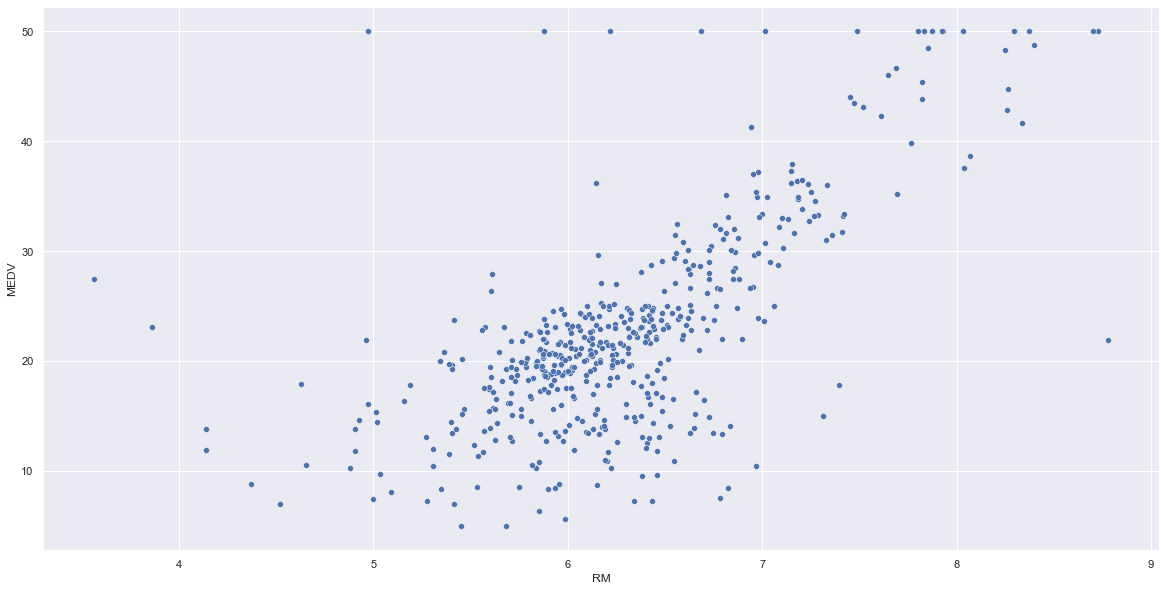

In [49]:
sns.scatterplot(x='RM',y='MEDV',data=df)

### Distribution of RM

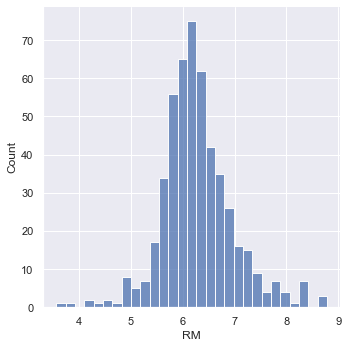

In [50]:
sns.displot(df,x='RM')

### AGE vs MEDV

<AxesSubplot:xlabel='AGE', ylabel='MEDV'>

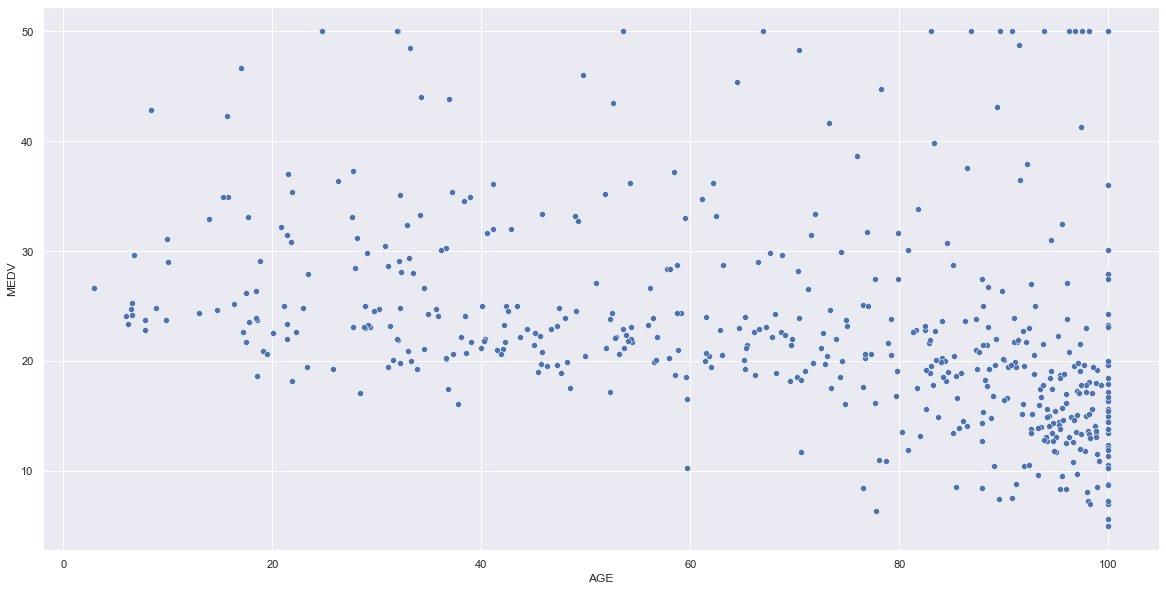

In [51]:
sns.scatterplot(x='AGE',y='MEDV',data=df)

### Distribution of AGE

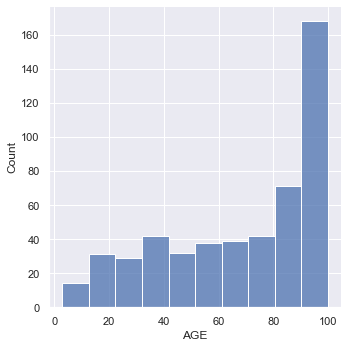

In [52]:
sns.displot(df,x='AGE')

### DIS vs MEDV

<AxesSubplot:xlabel='DIS', ylabel='MEDV'>

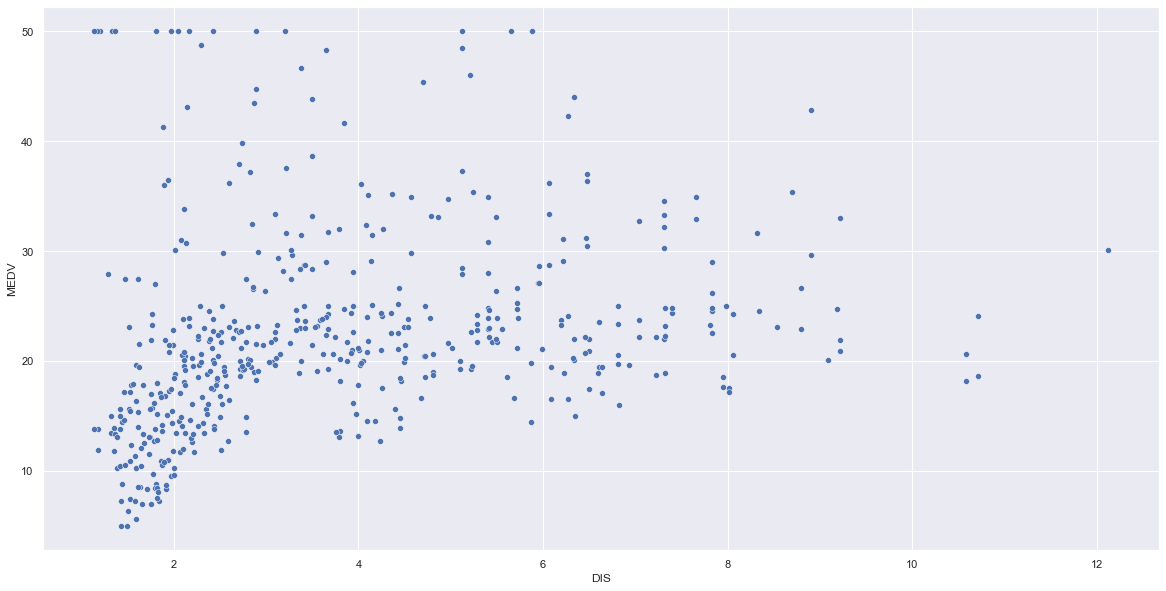

In [53]:
sns.scatterplot(x='DIS',y='MEDV',data=df)

### Distribution of DIS

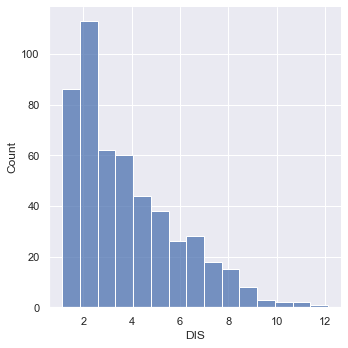

In [54]:
sns.displot(df,x='DIS')

### RAD vs MEDV

<AxesSubplot:xlabel='RAD', ylabel='MEDV'>

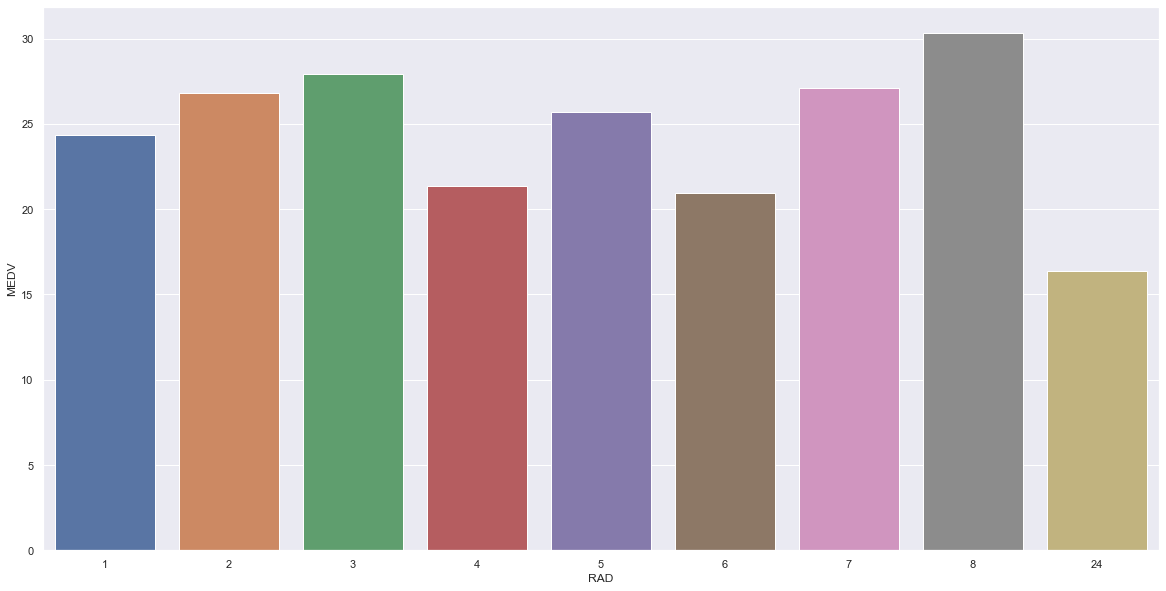

In [55]:
sns.barplot(x='RAD',y='MEDV',data=df,ci=None)

### TAX vs MEDV

<AxesSubplot:xlabel='TAX', ylabel='MEDV'>

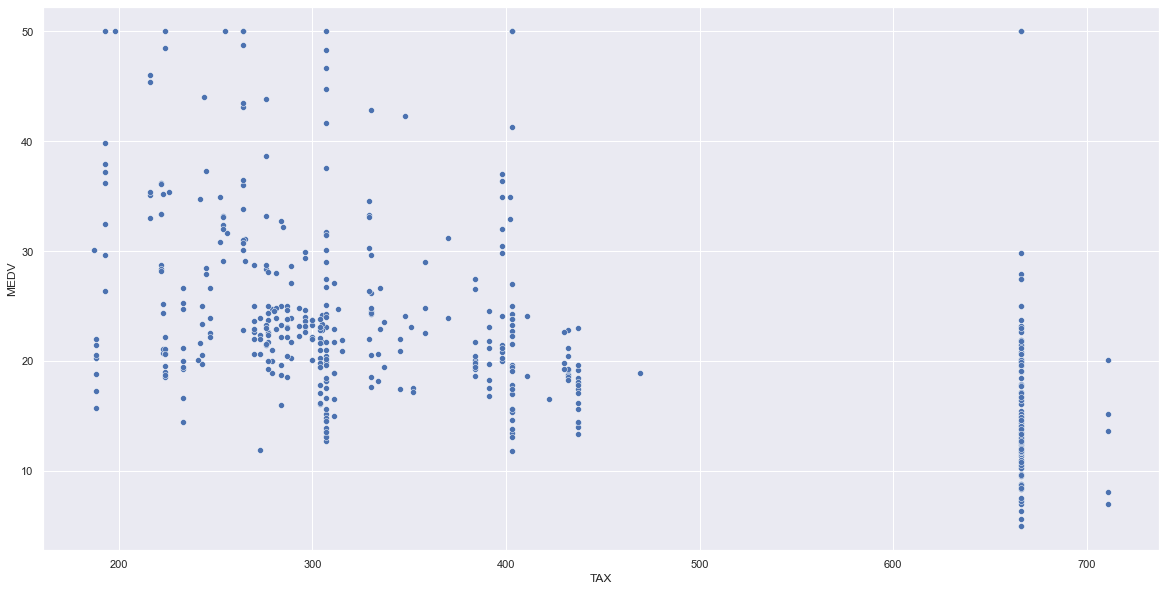

In [56]:
sns.scatterplot(data=df,x='TAX',y='MEDV')

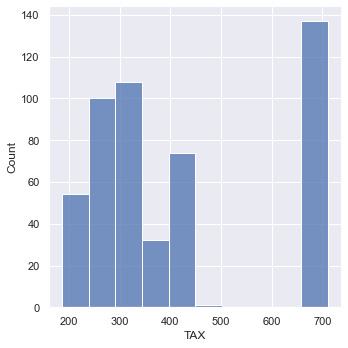

In [57]:
sns.displot(df,x='TAX')

### PTRATIO vs MEDV

<AxesSubplot:xlabel='PTRATIO', ylabel='MEDV'>

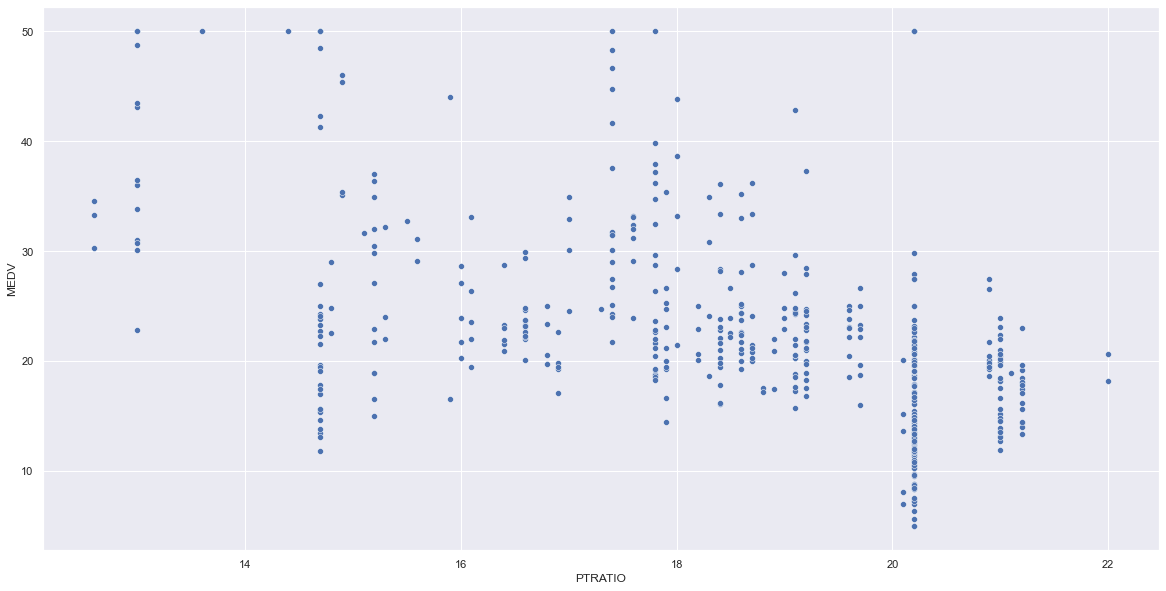

In [58]:
sns.scatterplot(data=df,x='PTRATIO',y='MEDV')

### Distribution of PTRATIO

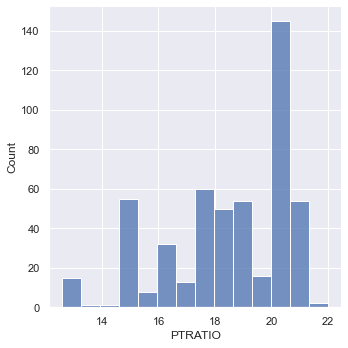

In [59]:
sns.displot(data=df,x='PTRATIO')

### B vs MEDV

<AxesSubplot:xlabel='B', ylabel='MEDV'>

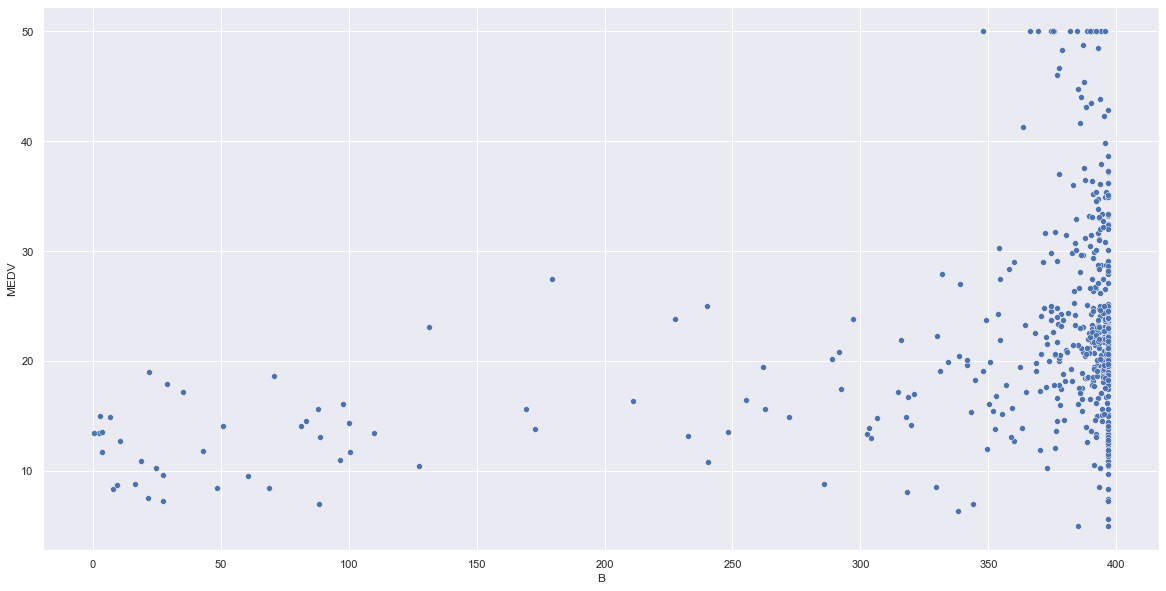

In [60]:
sns.scatterplot(data=df,x='B',y='MEDV')

### Distribution of B

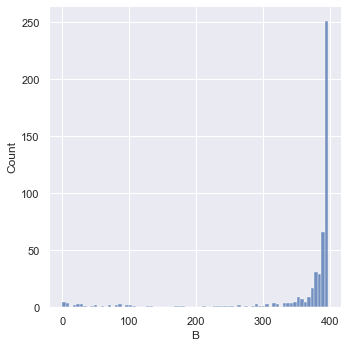

In [61]:
sns.displot(data=df,x='B')

### LSTAT vs MEDV

<AxesSubplot:xlabel='LSTAT', ylabel='MEDV'>

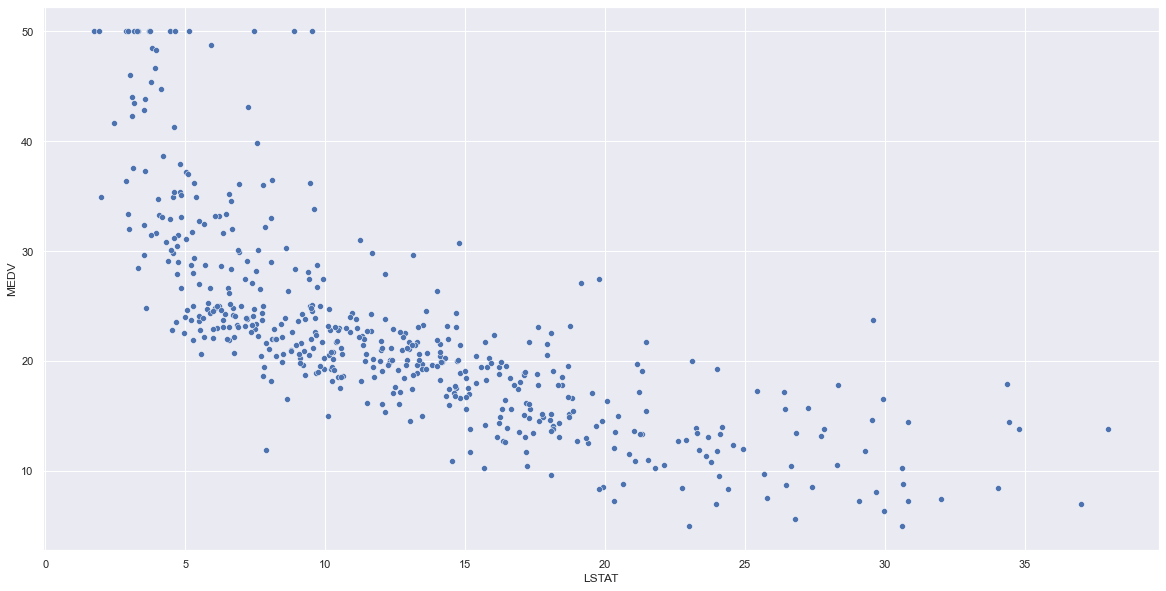

In [62]:
sns.scatterplot(data=df,x='LSTAT',y='MEDV')

### Distribution of LSTAT

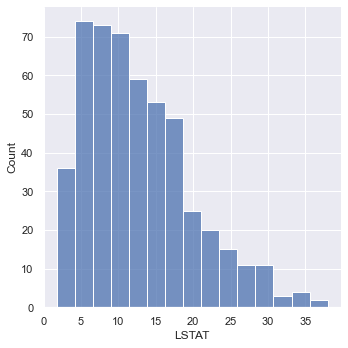

In [63]:
sns.displot(data=df,x='LSTAT')

## Correlation matrix

<AxesSubplot:>

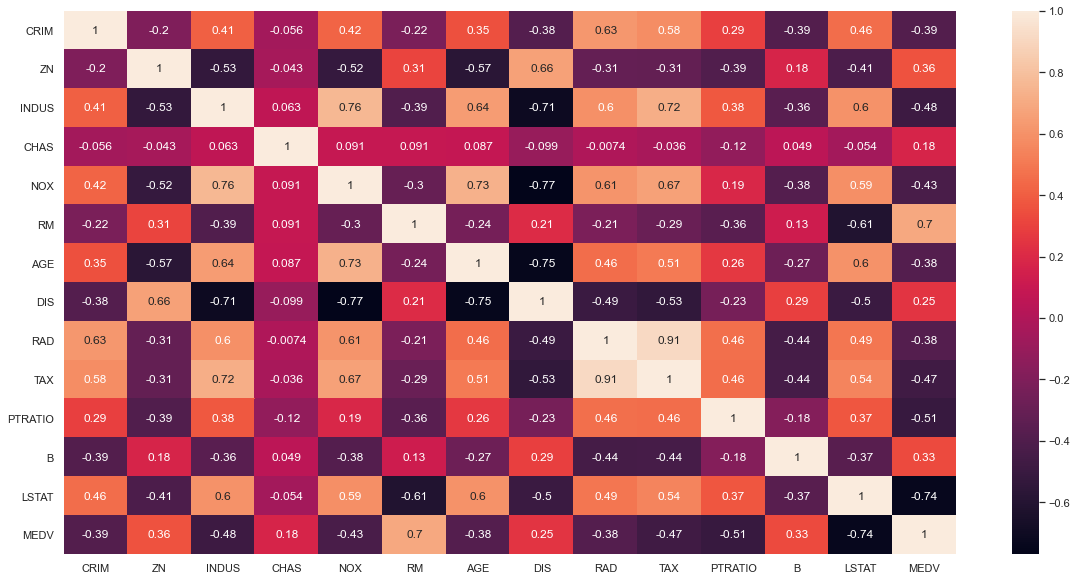

In [64]:
sns.heatmap(df.corr(),annot=True)

## Pair plot

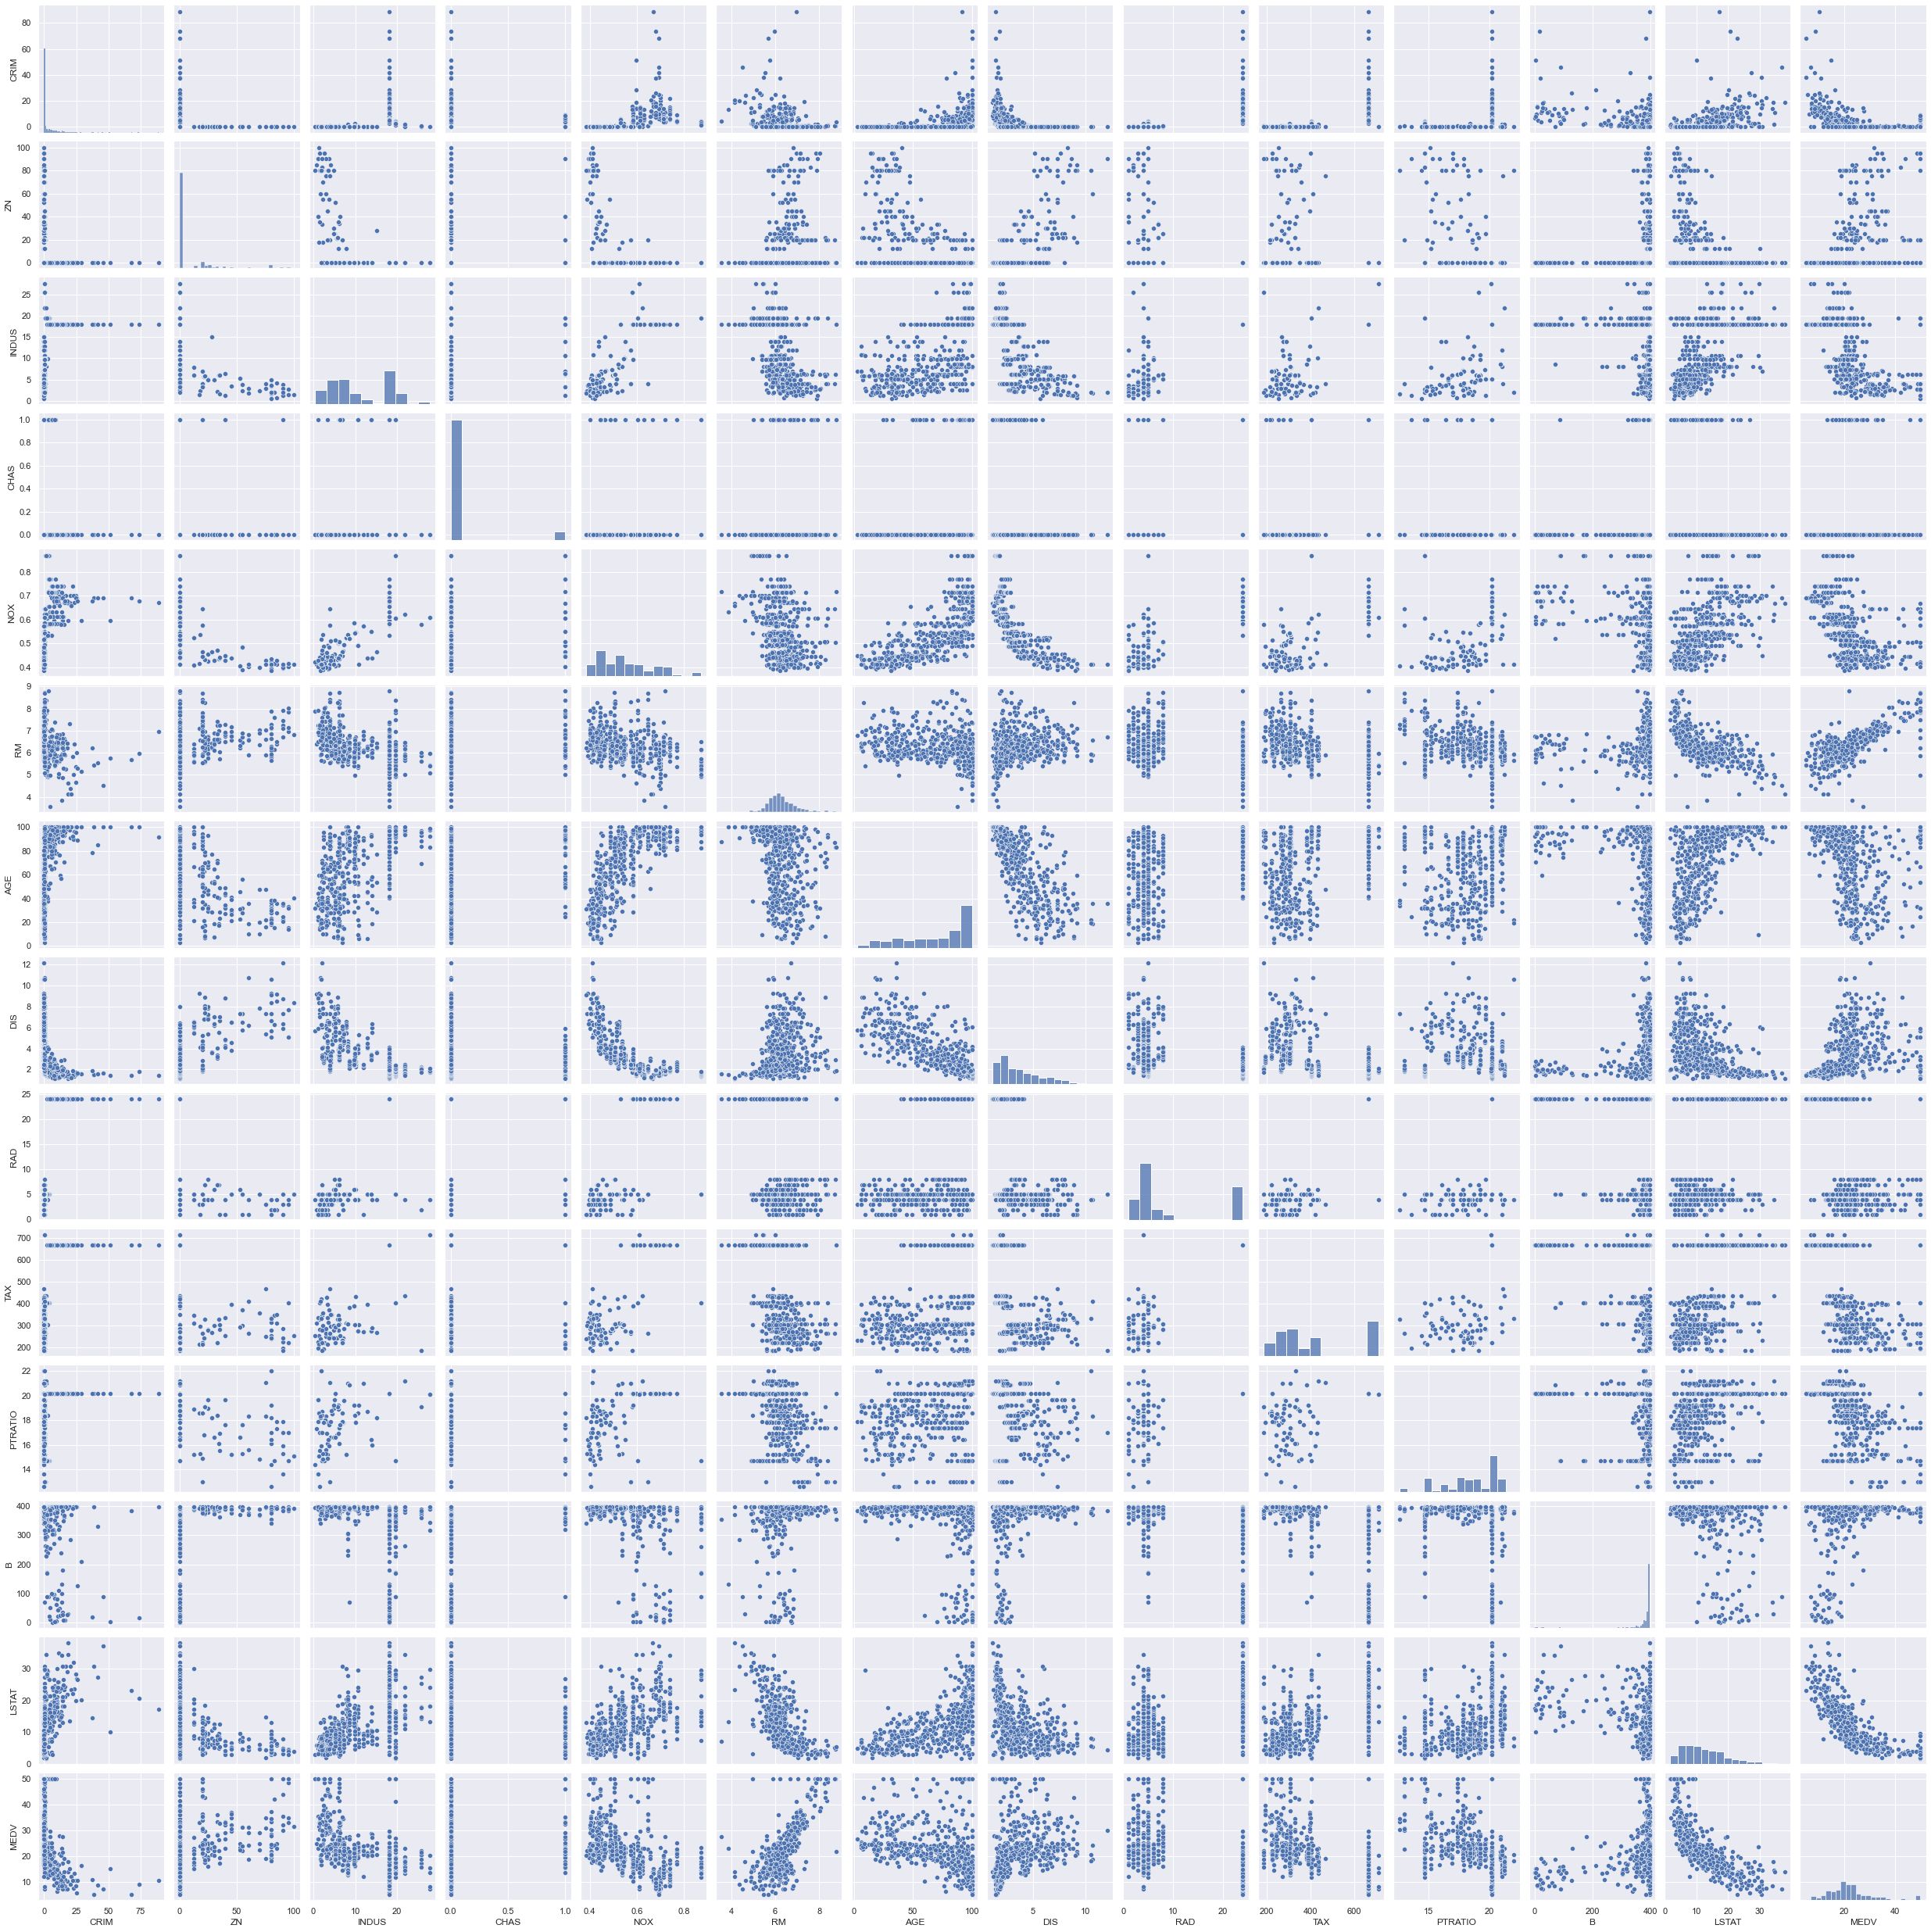

In [65]:
sns.pairplot(df)

In [66]:
df

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0    0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1    0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2    0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
3    0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
4    0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...    ...   
501  0.06263   0.0  11.93     0  0.573  6.593  69.1  2.4786    1  273.0   
502  0.04527   0.0  11.93     0  0.573  6.120  76.7  2.2875    1  273.0   
503  0.06076   0.0  11.93     0  0.573  6.976  91.0  2.1675    1  273.0   
504  0.10959   0.0  11.93     0  0.573  6.794  89.3  2.3889    1  273.0   
505  0.04741   0.0  11.93     0  0.573  6.030  80.8  2.5050    1  273.0   

     PTRATIO       B  LSTAT  MEDV  
0       15.3  396.90   4.98  24.0  
1       17.8  396.90   9.14  21.6  
2       17.8  392.83   4.03  34.7  
3       18.7  394.63   2.94  33.4  
4       18.7  396.90   5.33  36.2  
..       ...     ...    ...   ...  
501     21.0  391.99   9.67  22.4  
502     21.0  396.90   9.08  20.6  
503     21.0  396.90   5.64  23.9  
504     21.0  393.45   6.48  22.0  
505     21.0  396.90   7.88  11.9  

[506 rows x 14 columns]

In [67]:
# Dropping columns (one out of a pair) with |correlation| > 0.7
visited=[]
dropped_columns=[]
for i in df.columns:
    for j in df.columns:
        if i==j:
            continue
        if j in visited:
            continue

        if abs(df.corr()[i][j])>0.7:
            dropped_columns.append(i)
            visited.append(j)
dropped_columns=list(set(dropped_columns))  
dropped_columns.remove('MEDV')
print('dropped: ',dropped_columns)
df.drop(dropped_columns,axis=1)

dropped:  ['LSTAT', 'NOX', 'INDUS', 'TAX']


CRIM    ZN  CHAS     RM   AGE     DIS  RAD  PTRATIO       B  MEDV
0    0.00632  18.0     0  6.575  65.2  4.0900    1     15.3  396.90  24.0
1    0.02731   0.0     0  6.421  78.9  4.9671    2     17.8  396.90  21.6
2    0.02729   0.0     0  7.185  61.1  4.9671    2     17.8  392.83  34.7
3    0.03237   0.0     0  6.998  45.8  6.0622    3     18.7  394.63  33.4
4    0.06905   0.0     0  7.147  54.2  6.0622    3     18.7  396.90  36.2
..       ...   ...   ...    ...   ...     ...  ...      ...     ...   ...
501  0.06263   0.0     0  6.593  69.1  2.4786    1     21.0  391.99  22.4
502  0.04527   0.0     0  6.120  76.7  2.2875    1     21.0  396.90  20.6
503  0.06076   0.0     0  6.976  91.0  2.1675    1     21.0  396.90  23.9
504  0.10959   0.0     0  6.794  89.3  2.3889    1     21.0  393.45  22.0
505  0.04741   0.0     0  6.030  80.8  2.5050    1     21.0  396.90  11.9

[506 rows x 10 columns]

## b) ML
### 1) Linear regression

In [68]:
from sklearn.linear_model import LinearRegression

model= LinearRegression()
df[['CRIM','RM','AGE','DIS','PTRATIO','B','MEDV']]=(df[['CRIM','RM','AGE','DIS','PTRATIO','B','MEDV']]-df[['CRIM','RM','AGE','DIS','PTRATIO','B','MEDV']].mean())/df[['CRIM','RM','AGE','DIS','PTRATIO','B','MEDV']].std()
X=df.drop('MEDV',axis=1)
Y=df['MEDV']
x_train,x_test,y_train,y_test= train_test_split(X,Y,test_size=0.2,random_state=1)
x_test,x_val,y_test,y_val=train_test_split(x_test,y_test,test_size=0.5,random_state=1)
model=LinearRegression()
model.fit(x_train,y_train)
y_pred=model.predict(x_val)
print("Mean absolute error= ",mean_absolute_error(y_val,y_pred))
print('R2 score=',r2_score(y_val,y_pred))

Mean absolute error=  0.34653203746273037
R2 score= 0.8386997584016367


In [69]:
d1=pd.DataFrame(y_val).reset_index()
d2=pd.DataFrame(y_pred)
d=pd.concat([d1,d2],axis=1)
d['Error']=abs(d[0]-d['MEDV'])
d.rename(columns={0:'Predicted MEDV'},inplace=True)
d.describe().drop('index',axis=1)

MEDV  Predicted MEDV      Error
count  51.000000       51.000000  51.000000
mean    0.010504        0.004354   0.346532
std     1.146205        0.885386   0.299045
min    -1.764991       -1.954017   0.005703
25%    -0.650510       -0.509738   0.085371
50%    -0.166662       -0.079552   0.266245
75%     0.175837        0.285736   0.515846
max     2.986505        2.243021   1.277779

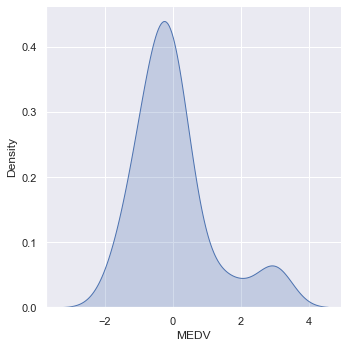

In [70]:
sns.displot(data=d,x='MEDV',kind='kde',fill=True)

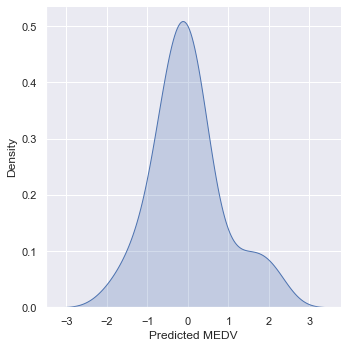

In [71]:
sns.displot(data=d,x='Predicted MEDV',kind='kde',fill=True)

<AxesSubplot:xlabel='MEDV', ylabel='Predicted MEDV'>

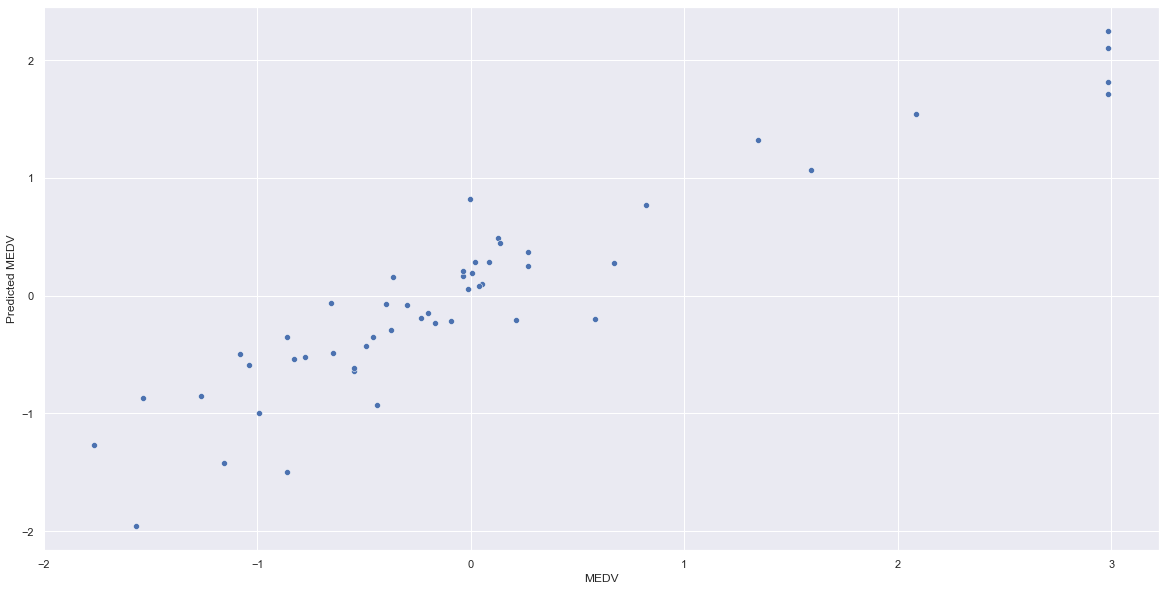

In [72]:
sns.scatterplot(data=d,x='MEDV',y='Predicted MEDV')

### 2) Random Forest

In [73]:

model2=RandomForestRegressor()
model2.fit(x_train,y_train)
y_pred=model2.predict(x_val)
print("Mean absolute error= ",mean_absolute_error(y_val,y_pred))
print('R2 score=',r2_score(y_val,y_pred))

Mean absolute error=  0.25933781330342776
R2 score= 0.9168145827770988


In [74]:
d1=pd.DataFrame(y_val).reset_index()
d2=pd.DataFrame(y_pred)
d=pd.concat([d1,d2],axis=1)
d['Error']=abs(d[0]-d['MEDV'])
d.rename(columns={0:'Predicted MEDV'},inplace=True)
d.describe().drop('index',axis=1)

MEDV  Predicted MEDV      Error
count  51.000000       51.000000  51.000000
mean    0.010504        0.041535   0.259338
std     1.146205        0.970214   0.201709
min    -1.764991       -1.238086   0.005654
25%    -0.650510       -0.498288   0.111013
50%    -0.166662       -0.172316   0.201803
75%     0.175837        0.238248   0.372726
max     2.986505        2.804056   0.900610

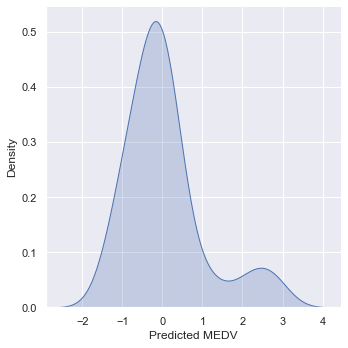

In [75]:
sns.displot(data=d,x='Predicted MEDV',kind='kde',fill=True)

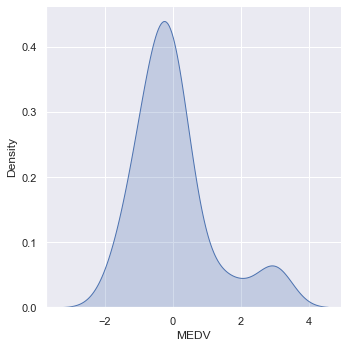

In [76]:
sns.displot(data=d,x='MEDV',kind='kde',fill=True)

<AxesSubplot:xlabel='MEDV', ylabel='Predicted MEDV'>

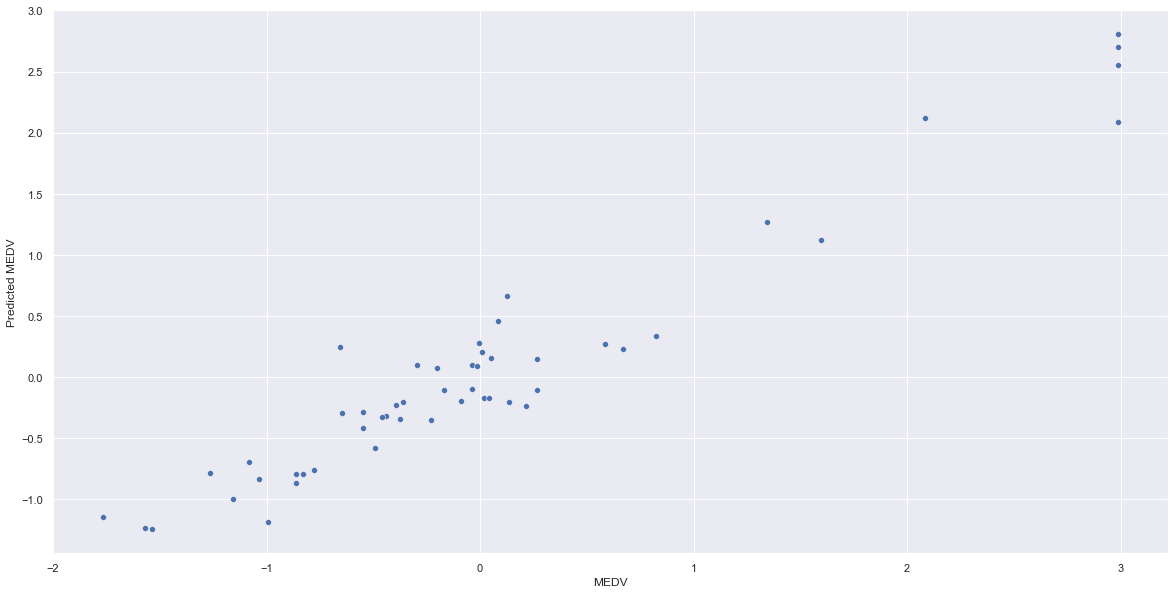

In [77]:
sns.scatterplot(data=d,x='MEDV',y='Predicted MEDV')

### 3) XGBoost

In [78]:
model3=xgb.XGBRegressor()
model3.fit(x_train,y_train)
y_pred=model3.predict(x_val)
print("Mean absolute error= ",mean_absolute_error(y_val,y_pred))
print('R2 score=',r2_score(y_val,y_pred))

Mean absolute error=  0.2671644587659482
R2 score= 0.904588624946385


In [79]:
d1=pd.DataFrame(y_val).reset_index()
d2=pd.DataFrame(y_pred)
d=pd.concat([d1,d2],axis=1)
d['Error']=abs(d[0]-d['MEDV'])
d.rename(columns={0:'Predicted MEDV'},inplace=True)
d.describe().drop('index',axis=1)

MEDV  Predicted MEDV      Error
count  51.000000       51.000000  51.000000
mean    0.010504        0.015139   0.267164
std     1.146205        0.973224   0.229229
min    -1.764991       -1.528441   0.005348
25%    -0.650510       -0.453841   0.119016
50%    -0.166662       -0.204286   0.190708
75%     0.175837        0.185080   0.372406
max     2.986505        2.903056   1.058937

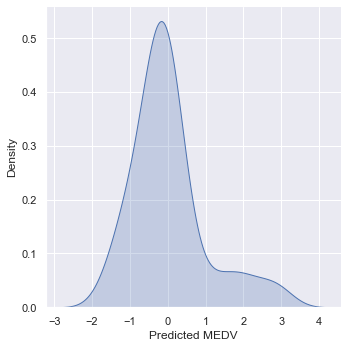

In [80]:
sns.displot(data=d,x='Predicted MEDV',kind='kde',fill=True)

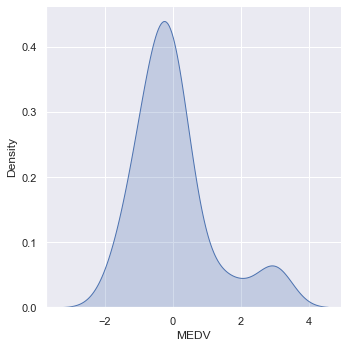

In [81]:
sns.displot(data=d,x='MEDV',kind='kde',fill=True)

<AxesSubplot:xlabel='MEDV', ylabel='Predicted MEDV'>

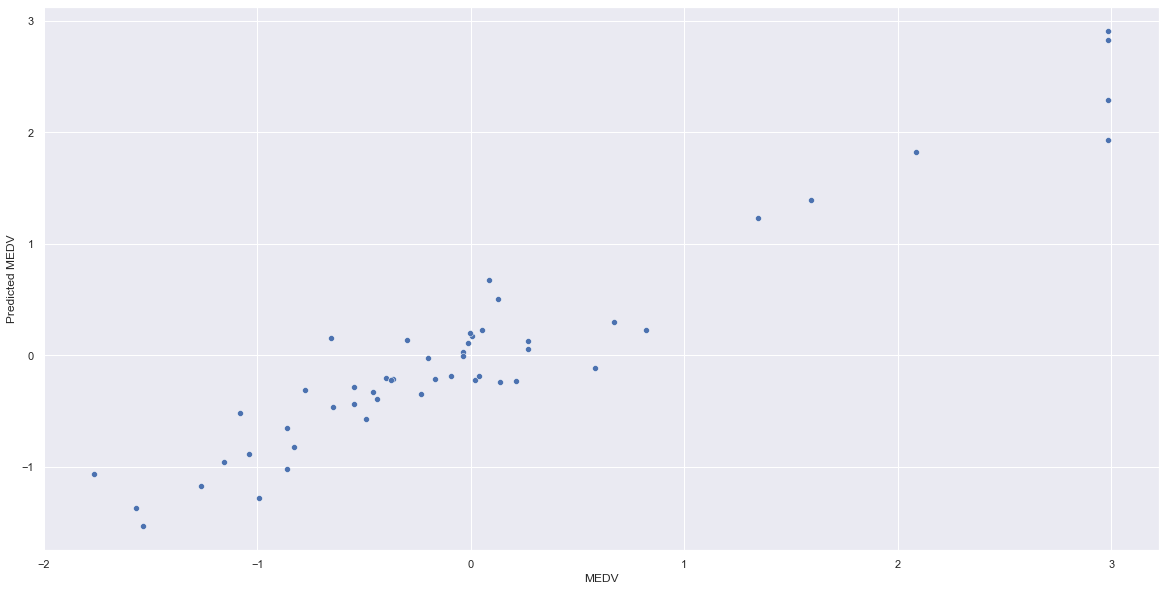

In [82]:
sns.scatterplot(data=d,x='MEDV',y='Predicted MEDV')

As we can see in the distribution function of predictions, there is slight anomaly compared to the true distribution. Hence, we now tune parameters using GridSearchCV

In [83]:
parameters = {'nthread':[4], 
              'objective':['reg:linear'],
              'learning_rate': [.03, 0.05, .07], 
              'max_depth': [5, 6, 7],
              'min_child_weight': [4],
              'silent': [1],
              'subsample': [0.7],
              'colsample_bytree': [0.7],
              'n_estimators': [500]}

xgb_grid = GridSearchCV(xgb.XGBRegressor(),
                        parameters)
xgb_grid.fit(x_val,y_val)
print(xgb_grid.best_score_)
print(xgb_grid.best_params_)

[19:55:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[19:55:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[19:55:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[19:55:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language binding

[19:55:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[19:55:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[19:55:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[19:55:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language binding

[19:55:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[19:55:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[19:55:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[19:55:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language binding

[19:55:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[19:55:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[19:55:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[19:55:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language binding

In [84]:
model3=xgb.XGBRegressor(colsample_bytree=0.7,learning_rate=0.03,max_depth=7,min_child_weight=4,n_estimators=500,nthread=4,objective='reg:linear',silent=1,subsample=0.7,verbosity=0)
model3.fit(x_train,y_train)
y_pred=model3.predict(x_val)
print("Mean absolute error= ",mean_absolute_error(y_val,y_pred))
print('R2 score=',r2_score(y_val,y_pred))

Mean absolute error=  0.24921720693435664
R2 score= 0.9111455703831155


In [85]:
d1=pd.DataFrame(y_val).reset_index()
d2=pd.DataFrame(y_pred)
d=pd.concat([d1,d2],axis=1)
d['Error']=abs(d[0]-d['MEDV'])
d.rename(columns={0:'Predicted MEDV'},inplace=True)
d.describe().drop('index',axis=1)

MEDV  Predicted MEDV      Error
count  51.000000       51.000000  51.000000
mean    0.010504        0.079083   0.249217
std     1.146205        0.970913   0.231051
min    -1.764991       -1.295560   0.008137
25%    -0.650510       -0.434966   0.079608
50%    -0.166662       -0.104248   0.177140
75%     0.175837        0.264019   0.305986
max     2.986505        2.824568   0.996595

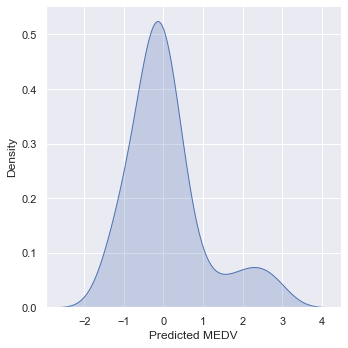

In [86]:
sns.displot(data=d,x='Predicted MEDV',kind='kde',fill=True)

The model turns out to be better now. Clearly this model has the best score among all three. Now let us test this model on Test data.

## Final Testing

In [87]:
model3=xgb.XGBRegressor(colsample_bytree=0.7,learning_rate=0.03,max_depth=7,min_child_weight=4,n_estimators=500,nthread=4,objective='reg:linear',silent=1,subsample=0.7,verbosity=0)
model3.fit(x_train,y_train)
y_pred=model3.predict(x_test)
print("Mean absolute error= ",mean_absolute_error(y_test,y_pred))
print('R2 score=',r2_score(y_test,y_pred))

Mean absolute error=  0.22897296361139793
R2 score= 0.9161103634506378


In [88]:
d1=pd.DataFrame(y_test).reset_index()
d2=pd.DataFrame(y_pred)
d=pd.concat([d1,d2],axis=1)
d['Error']=abs(d[0]-d['MEDV'])
d.rename(columns={0:'Predicted MEDV'},inplace=True)
d.describe().drop('index',axis=1)

MEDV  Predicted MEDV      Error
count  51.000000       51.000000  51.000000
mean   -0.001435       -0.014537   0.228973
std     1.034208        0.933680   0.190394
min    -1.547531       -1.712232   0.003839
25%    -0.721184       -0.561466   0.072848
50%    -0.057932       -0.165027   0.165945
75%     0.170401        0.314547   0.360767
max     2.986505        2.665553   0.668908

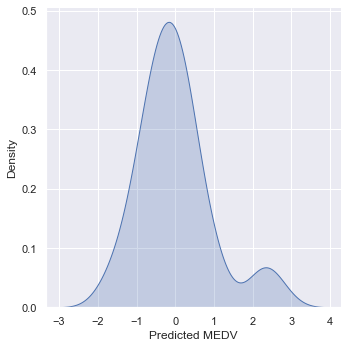

In [89]:
sns.displot(data=d,x='Predicted MEDV',kind='kde',fill=True)

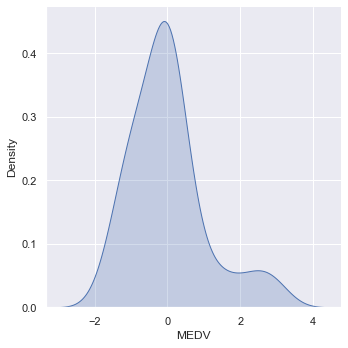

In [90]:
sns.displot(data=d,x='MEDV',kind='kde',fill=True)

<AxesSubplot:xlabel='MEDV', ylabel='Predicted MEDV'>

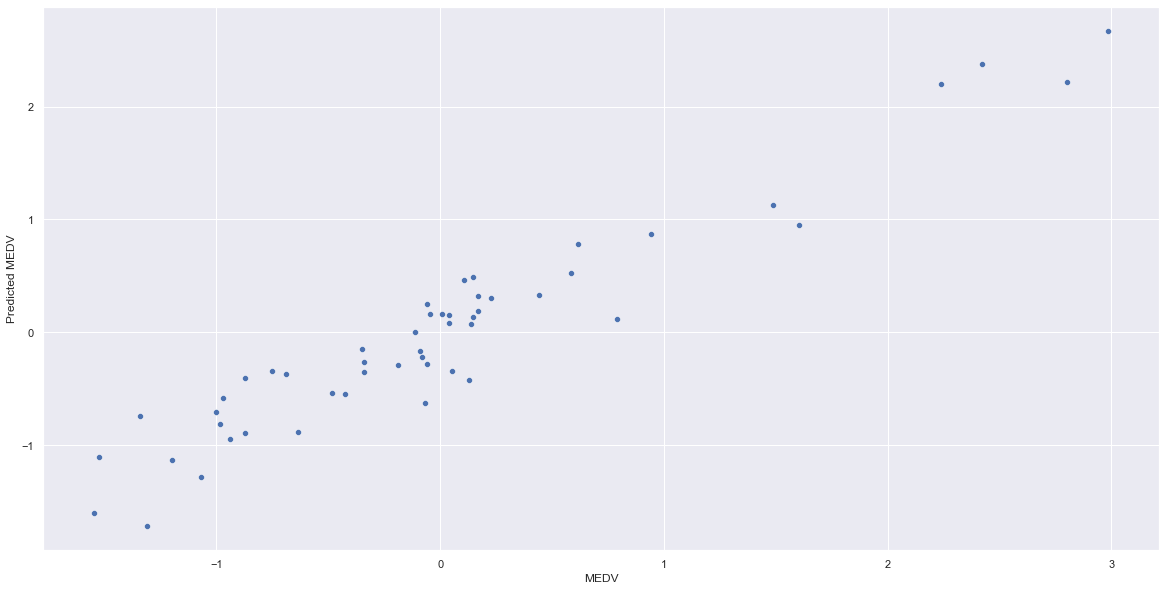

In [91]:
sns.scatterplot(data=d,x='MEDV',y='Predicted MEDV')